In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
from IPython.display import display
from sklearn.externals import joblib

basepath = os.path.expanduser('../')

## Load Data

In [3]:
%%time

app_train = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_train.pkl'))
# app_test  = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_test.pkl'))

# # additional tables
# bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau.pkl'))
# bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/POS_CASH_balance.pkl'))
# credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/credit_card_balance.pkl'))

CPU times: user 43.2 ms, sys: 145 ms, total: 188 ms
Wall time: 188 ms


In [4]:
app_train.TARGET.value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

## EDA

In [5]:
print('Training data: {}'.format(app_train.shape))
print('Test data: {}'.format(app_test.shape))

Training data: (307511, 122)
Test data: (48744, 122)


### Look for features that are constant in the train set

In [12]:
# train set
for col in app_train.columns:
    if app_train[col].nunique(dropna=False) == 1:
        print('Unique feature: {}'.format(col))

In [13]:
# test set
for col in app_test.columns:
    if col != 'TARGET' and app_test[col].nunique(dropna=False) == 1:
        print('Unique feature: {}'.format(col))

Unique feature: FLAG_DOCUMENT_10
Unique feature: FLAG_DOCUMENT_12
Unique feature: FLAG_DOCUMENT_13
Unique feature: FLAG_DOCUMENT_14
Unique feature: FLAG_DOCUMENT_15
Unique feature: FLAG_DOCUMENT_16
Unique feature: FLAG_DOCUMENT_17
Unique feature: FLAG_DOCUMENT_19
Unique feature: FLAG_DOCUMENT_2
Unique feature: FLAG_DOCUMENT_20
Unique feature: FLAG_DOCUMENT_21


** Remove these features from the analysis. **

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

### Getting Domain Knowledge

In [17]:
display_all(app_train.head().T)

0  \
AMT_ANNUITY                                         24700.5   
AMT_CREDIT                                           406598   
AMT_GOODS_PRICE                                      351000   
AMT_INCOME_TOTAL                                     202500   
AMT_REQ_CREDIT_BUREAU_DAY                                 0   
AMT_REQ_CREDIT_BUREAU_HOUR                                0   
AMT_REQ_CREDIT_BUREAU_MON                                 0   
AMT_REQ_CREDIT_BUREAU_QRT                                 0   
AMT_REQ_CREDIT_BUREAU_WEEK                                0   
AMT_REQ_CREDIT_BUREAU_YEAR                                1   
APARTMENTS_AVG                                     0.024704   
APARTMENTS_MEDI                                   0.0249939   
APARTMENTS_MODE                                   0.0252075   
BASEMENTAREA_AVG                                  0.0368958   
BASEMENTAREA_MEDI                                 0.0368958   
BASEMENTAREA_MODE                                 0.0382996   
CNT_CHILDREN                                              0   
CNT_FAM_MEMBERS                                           1   
CODE_GENDER                                               M   
COMMONAREA_AVG                                    0.0142975   
COMMONAREA_MEDI                                   0.0143967   
COMMONAREA_MODE                                   0.0143967   
DAYS_BIRTH                                            -9461   
DAYS_EMPLOYED                                          -637   
DAYS_ID_PUBLISH                                       -2120   
DAYS_LAST_PHONE_CHANGE                                -1134   
DAYS_REGISTRATION                                     -3648   
DEF_30_CNT_SOCIAL_CIRCLE                                  2   
DEF_60_CNT_SOCIAL_CIRCLE                                  2   
ELEVATORS_AVG                                             0   
ELEVATORS_MEDI                                            0   
ELEVATORS_MODE                                            0   
EMERGENCYSTATE_MODE                                      No   
ENTRANCES_AVG                                     0.0689697   
ENTRANCES_MEDI                                    0.0689697   
ENTRANCES_MODE                                    0.0689697   
EXT_SOURCE_1                                      0.0830078   
EXT_SOURCE_2                                       0.262939   
EXT_SOURCE_3                                       0.139404   
FLAG_CONT_MOBILE                                          1   
FLAG_DOCUMENT_10                                          0   
FLAG_DOCUMENT_11                                          0   
FLAG_DOCUMENT_12                                          0   
FLAG_DOCUMENT_13                                          0   
FLAG_DOCUMENT_14                                          0   
FLAG_DOCUMENT_15                                          0   
FLAG_DOCUMENT_16                                          0   
FLAG_DOCUMENT_17                                          0   
FLAG_DOCUMENT_18                                          0   
FLAG_DOCUMENT_19                                          0   
FLAG_DOCUMENT_2                                           0   
FLAG_DOCUMENT_20                                          0   
FLAG_DOCUMENT_21                                          0   
FLAG_DOCUMENT_3                                           1   
FLAG_DOCUMENT_4                                           0   
FLAG_DOCUMENT_5                                           0   
FLAG_DOCUMENT_6                                           0   
FLAG_DOCUMENT_7                                           0   
FLAG_DOCUMENT_8                                           0   
FLAG_DOCUMENT_9                                           0   
FLAG_EMAIL                                                0   
FLAG_EMP_PHONE                                            1   
FLAG_MOBIL                                                1   
FLAG_OWN_CAR              

## Current Application

### AMT_CREDIT: Credit Amount of the loan

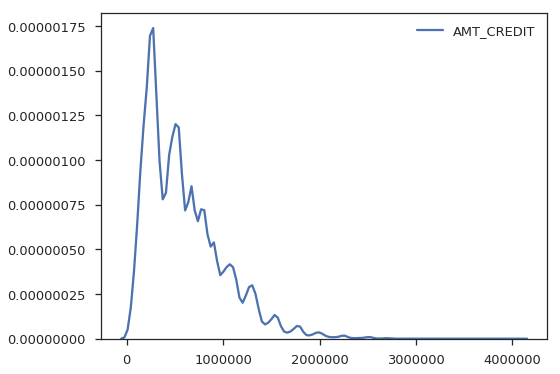

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.AMT_CREDIT);

### AMT_ANNUITY: Loan Annuity

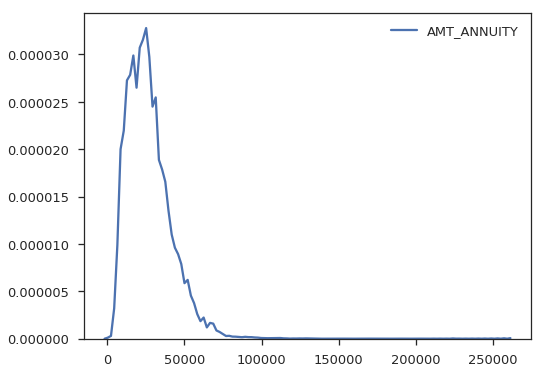

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.AMT_ANNUITY);

### Relationship between AMT_CREDIT and AMT_ANNUITY

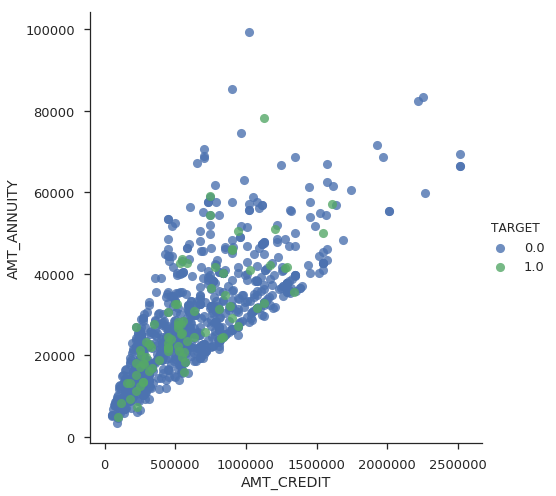

In [32]:
x=app_train.sample(n=1000)
sns.lmplot(x='AMT_CREDIT', y='AMT_ANNUITY', data=x, hue='TARGET', size=7, fit_reg=False);

### Relationship of AMT_CREDIT, AMT_ANNUITY with row index

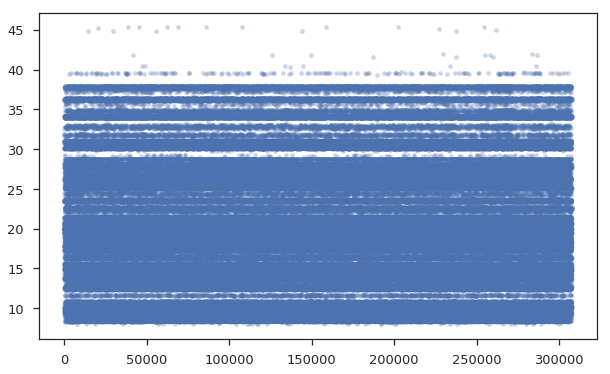

In [6]:
x = app_train
x.loc[:, 'ratio'] = x.AMT_CREDIT / x.AMT_ANNUITY
plt.figure(figsize=(10, 6))
plt.plot(x.index, x.ratio, '.', alpha=.3);

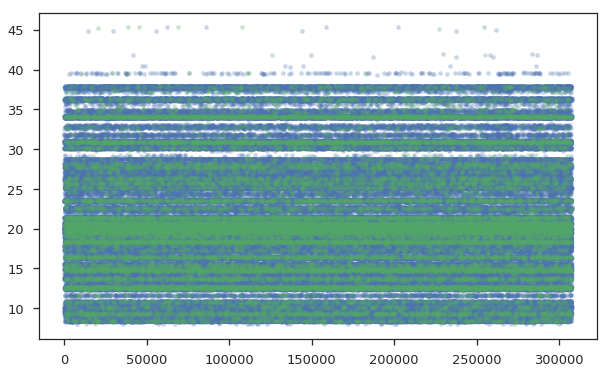

In [9]:
x = app_train
x.loc[:, 'ratio'] = x.AMT_CREDIT / x.AMT_ANNUITY
plt.figure(figsize=(10, 6))
plt.plot(x[x.TARGET==0].index, x[x.TARGET==0].ratio, '.', alpha=.3)
plt.plot(x[x.TARGET==1].index, x[x.TARGET==1].ratio, '.', alpha=.3);

### Distribution of AMT_CREDIT, ANNUITY in train and test

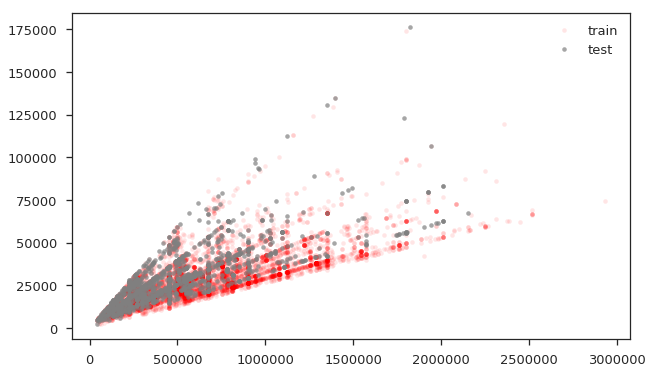

In [18]:
x = pd.concat((app_train, app_test))
x.loc[:, 'class_mode'] = 'train'
x.iloc[len(app_train):]['class_mode'] = 'test'
x = x.sample(n=10000)

plt.figure(figsize=(10, 6))
plt.plot(x[x.class_mode == 'train'].AMT_CREDIT, x[x.class_mode=='train'].AMT_ANNUITY, '.', alpha=.1, c='r', label='train')
plt.plot(x[x.class_mode == 'test'].AMT_CREDIT, x[x.class_mode=='test'].AMT_ANNUITY, '.', alpha=.7, c='gray', label='test')
plt.legend(loc='best');

### REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in more populated region)

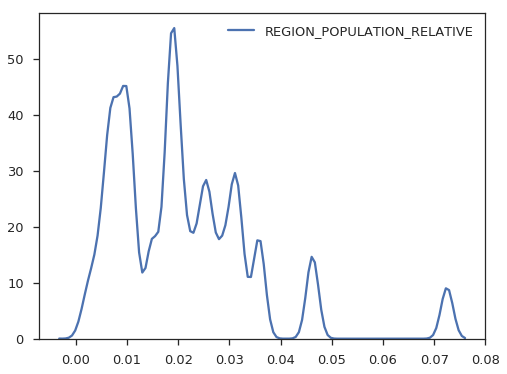

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.REGION_POPULATION_RELATIVE);

** Count number of unique values. **

In [35]:
app_train.REGION_POPULATION_RELATIVE.nunique()

81

### AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given

In [39]:
print('%age of missing values: {}'.format(app_train.AMT_GOODS_PRICE.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.09040327012692229


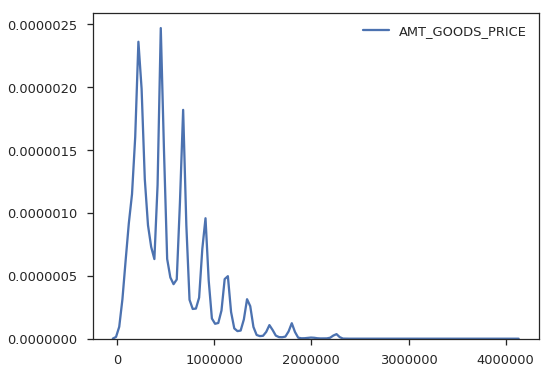

In [40]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.AMT_GOODS_PRICE);

### Relationship of AMT_GOODS_PRICE vs AMT_CREDIT

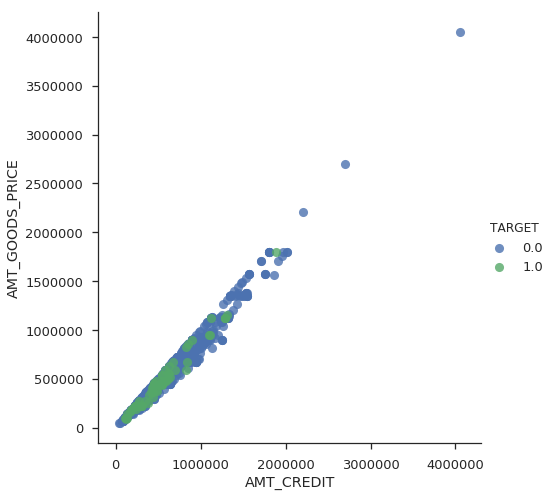

In [41]:
x=app_train.sample(n=1000)
sns.lmplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=x, hue='TARGET', size=7, fit_reg=False);

### Relationship of AMT_GOODS_PRICE with AMT_ANNUITY

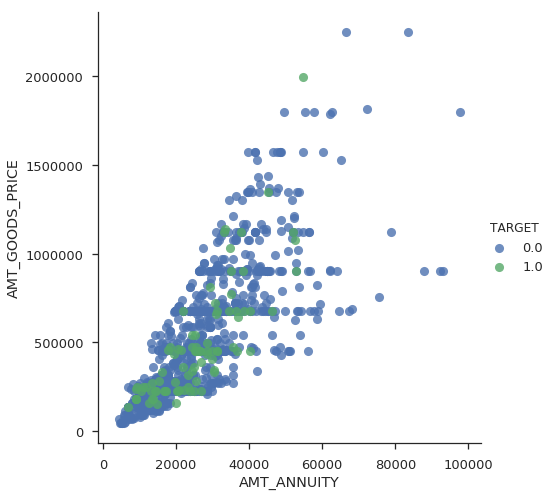

In [42]:
x=app_train.sample(n=1000)
sns.lmplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=x, hue='TARGET', size=7, fit_reg=False);

### AMT_INCOME_TOTAL: Income of the client

In [51]:
print('%age of missing values: {}'.format(app_train.AMT_INCOME_TOTAL.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


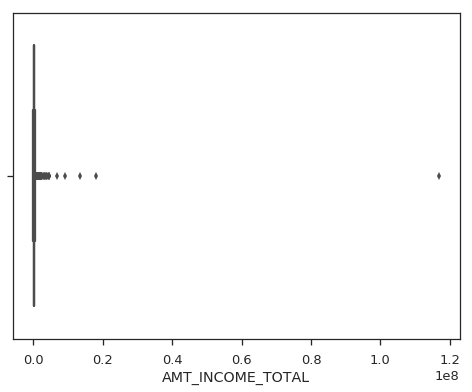

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(app_train.AMT_INCOME_TOTAL);

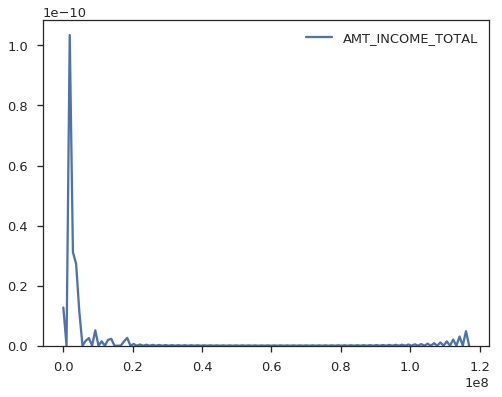

In [52]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.AMT_INCOME_TOTAL);

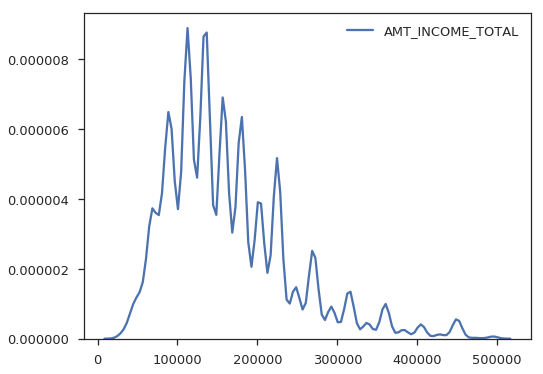

In [60]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train[app_train.AMT_INCOME_TOTAL < 5e5].AMT_INCOME_TOTAL);

In [59]:
app_train.AMT_INCOME_TOTAL.describe(percentiles=[.9, .99])

count    3.075110e+05
mean     1.687391e+05
std      2.371759e+05
min      2.565000e+04
50%      1.471500e+05
90%      2.700000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [8]:
app_train[app_train.AMT_INCOME_TOTAL > 5e5].TARGET.value_counts(normalize=True)

0.0    0.945966
1.0    0.054034
Name: TARGET, dtype: float64

### Relationship of Income with Credit

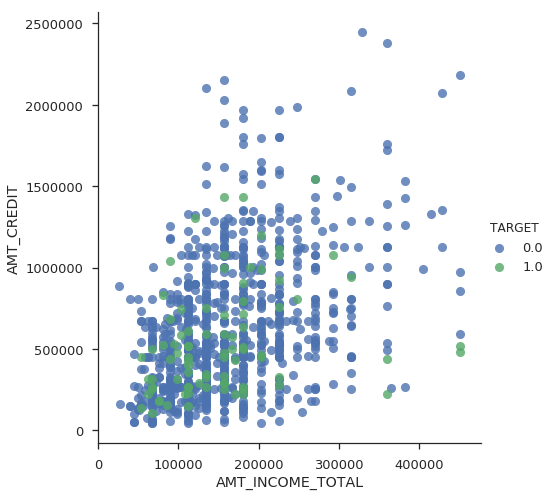

In [9]:
x=app_train[app_train.AMT_INCOME_TOTAL < 5e5].sample(n=1000)
sns.lmplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=x, hue='TARGET', size=7, fit_reg=False);

### Relationship of Income with Annuity

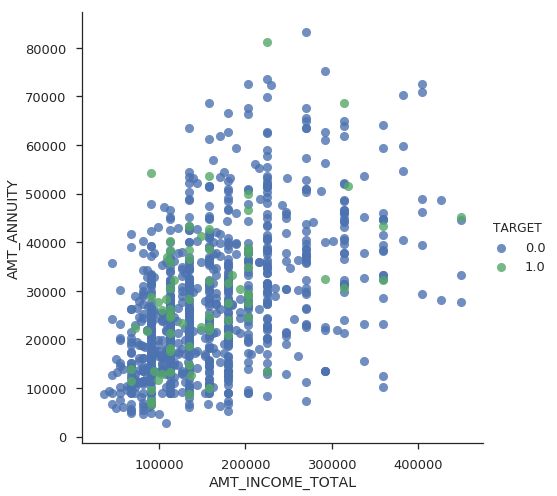

In [11]:
x=app_train[app_train.AMT_INCOME_TOTAL < 5e5].sample(n=1000)
sns.lmplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', data=x, hue='TARGET', size=7, fit_reg=False);

### DAYS_BIRTH: Client's age in days at the time of application

In [43]:
print('%age of missing values: {}'.format(app_train.DAYS_BIRTH.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


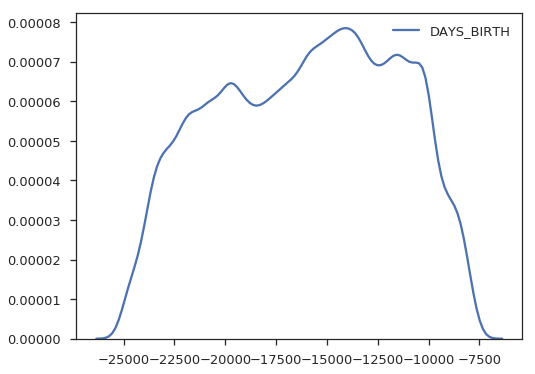

In [44]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.DAYS_BIRTH);

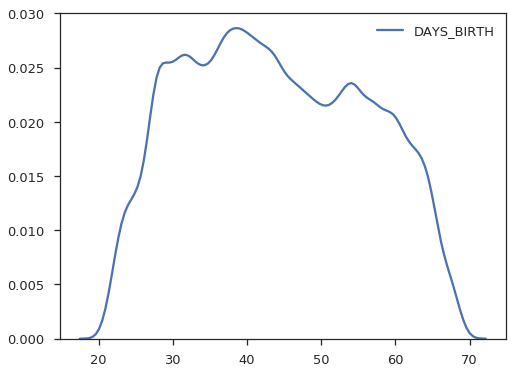

In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(-app_train.DAYS_BIRTH/365);

### Relationship of DAYS_BIRTH with AMT_CREDIT

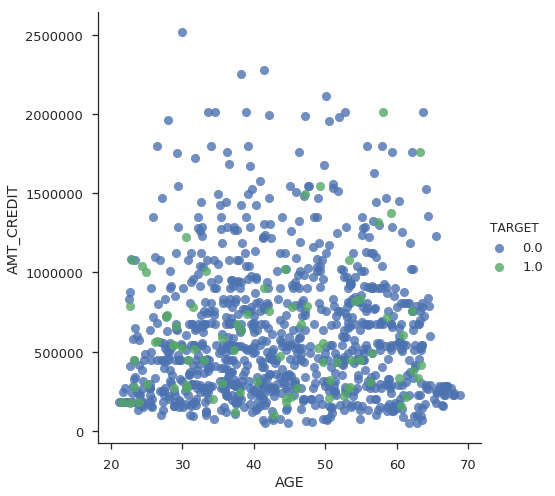

In [49]:
x=app_train.sample(n=1000)
x.loc[:, 'AGE'] = -x.DAYS_BIRTH/365
sns.lmplot(x='AGE', y='AMT_CREDIT', data=x, hue='TARGET', size=7, fit_reg=False);

### Relationship of DAYS_BIRTH with AMT_ANNUITY

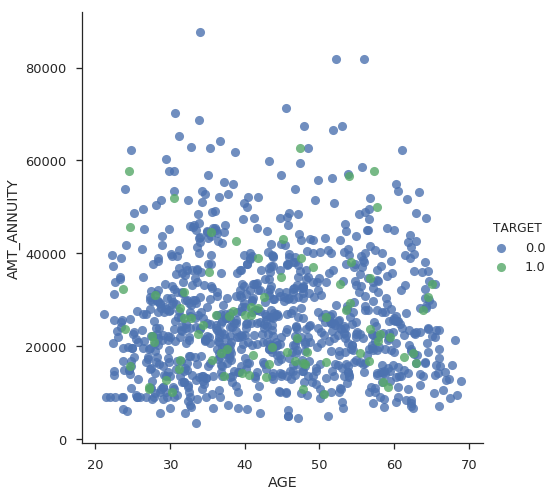

In [50]:
x=app_train.sample(n=1000)
x.loc[:, 'AGE'] = -x.DAYS_BIRTH/365
sns.lmplot(x='AGE', y='AMT_ANNUITY', data=x, hue='TARGET', size=7, fit_reg=False);

### Relationship of age, Income and credit

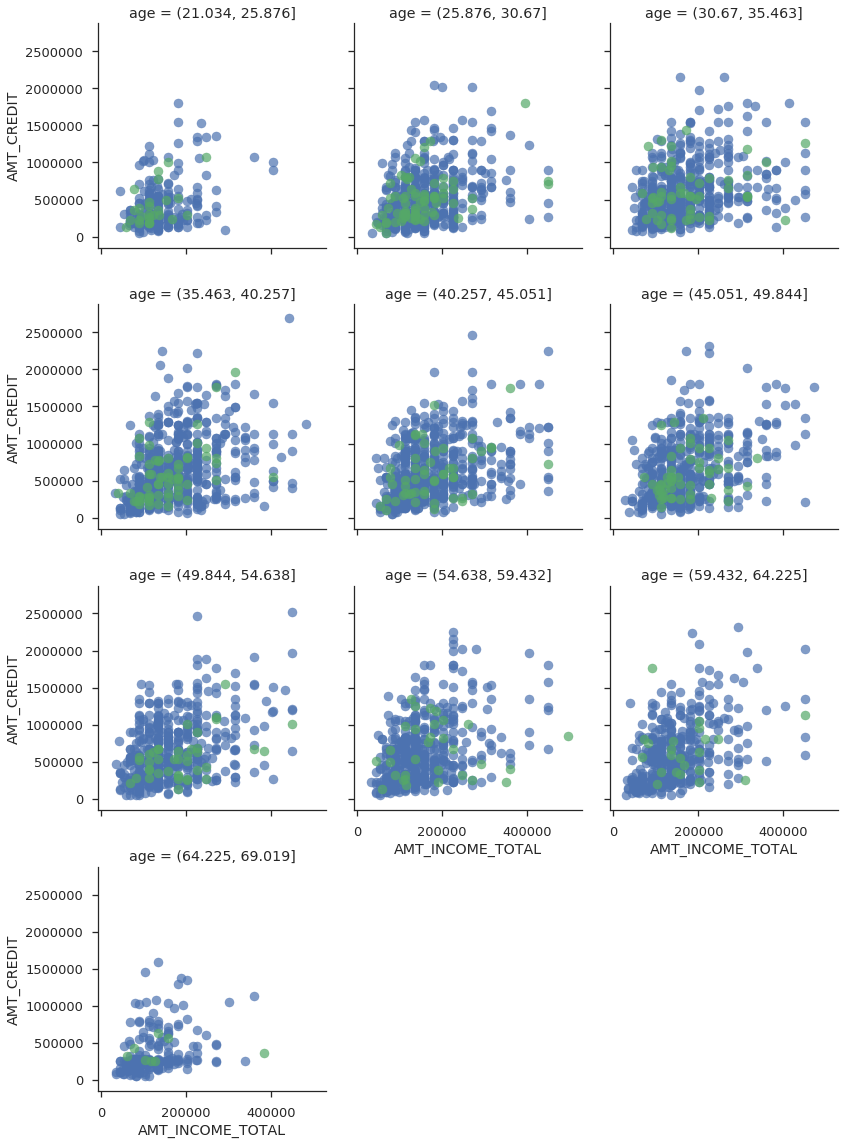

In [19]:
x = app_train[app_train.AMT_INCOME_TOTAL < 5e5].sample(n=5000)
x.loc[:, 'age'] = pd.cut(-x.DAYS_BIRTH/365, bins=10)
g = sns.FacetGrid(data=x, col='age', hue='TARGET', col_wrap=3, size=4)
g = g.map(plt.scatter, 'AMT_INCOME_TOTAL', 'AMT_CREDIT', alpha=.7);

### Relationship of age, income and annuity

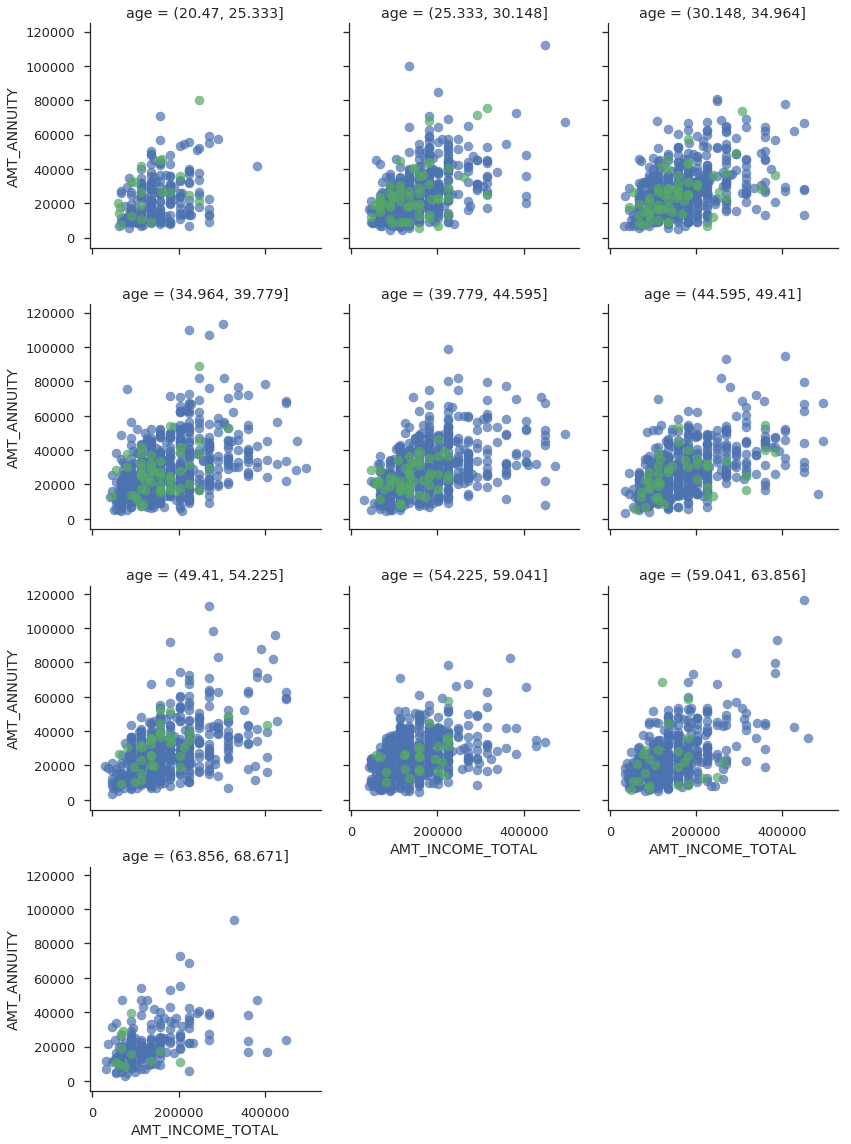

In [20]:
x = app_train[app_train.AMT_INCOME_TOTAL < 5e5].sample(n=5000)
x.loc[:, 'age'] = pd.cut(-x.DAYS_BIRTH/365, bins=10)
g = sns.FacetGrid(data=x, col='age', hue='TARGET', col_wrap=3, size=4)
g = g.map(plt.scatter, 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', alpha=.7);

### DAYS_EMPLOYED: How many days before the application the person started current employment

In [21]:
print('%age of missing values: {}'.format(app_train.DAYS_EMPLOYED.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


In [22]:
app_train.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

** NaNs are encoded as 365243 **

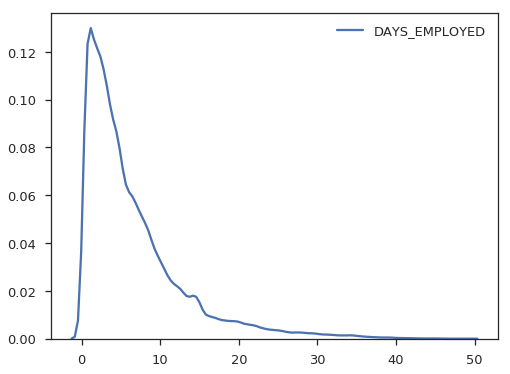

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(-app_train.DAYS_EMPLOYED.replace({365243: np.nan})/365);

### Relationship of DAYS_EMPLOYED with DAYS_BIRTH

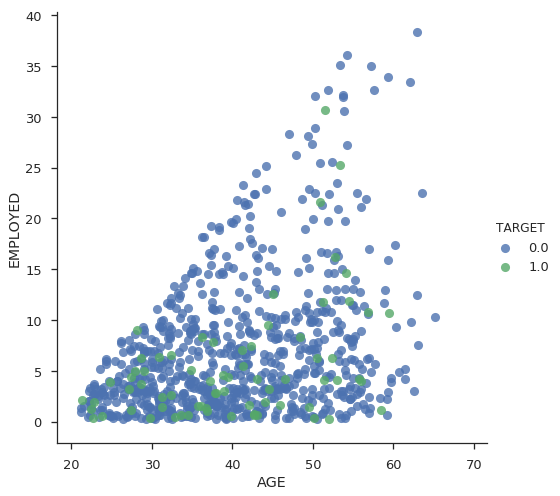

In [24]:
x=app_train.sample(n=1000)
x.loc[:, 'AGE'] = -x.DAYS_BIRTH/365
x.loc[:, 'EMPLOYED'] = (-x.DAYS_EMPLOYED.replace({365243: np.nan})/365)
sns.lmplot(x='AGE', y='EMPLOYED', data=x, hue='TARGET', size=7, fit_reg=False);

### Relationship of age, employed and credit

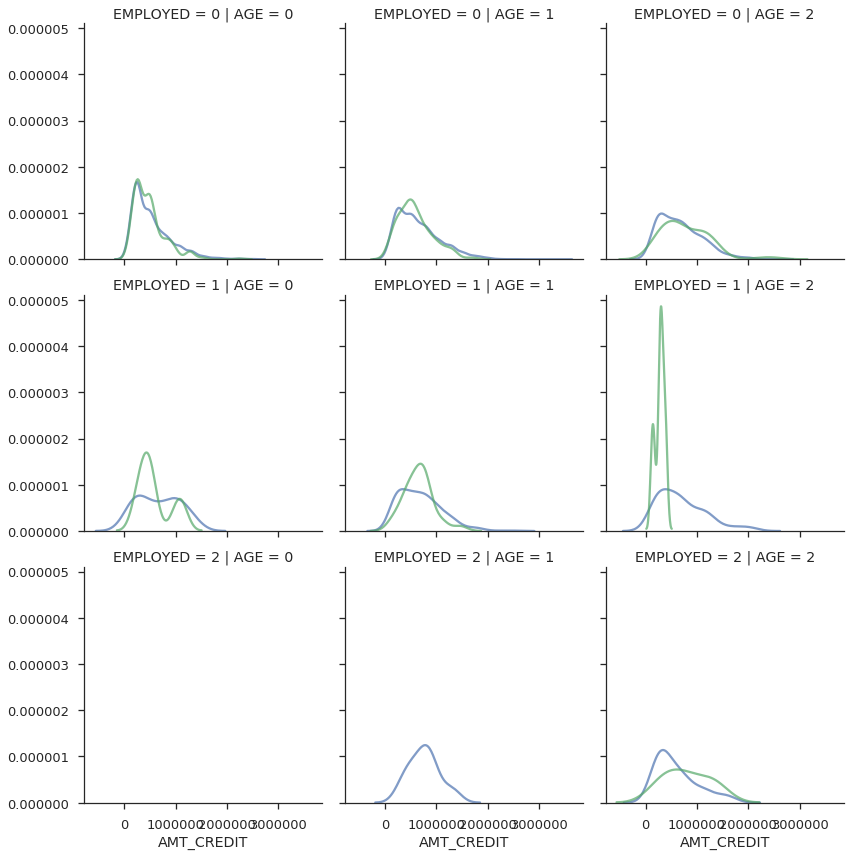

In [34]:
x = app_train.sample(n=10000)
x.loc[:, 'AGE'] = pd.cut(-x.DAYS_BIRTH/365, bins=3, labels=np.arange(3))
x.loc[:, 'EMPLOYED'] = pd.cut((-x.DAYS_EMPLOYED.replace({365243: np.nan})/365), bins=3, labels=np.arange(3))
g = sns.FacetGrid(data=x, col='AGE', row='EMPLOYED', hue='TARGET', size=4)
g = g.map(sns.kdeplot, 'AMT_CREDIT', alpha=.7);

### Relationship of age, employed and normalized region population

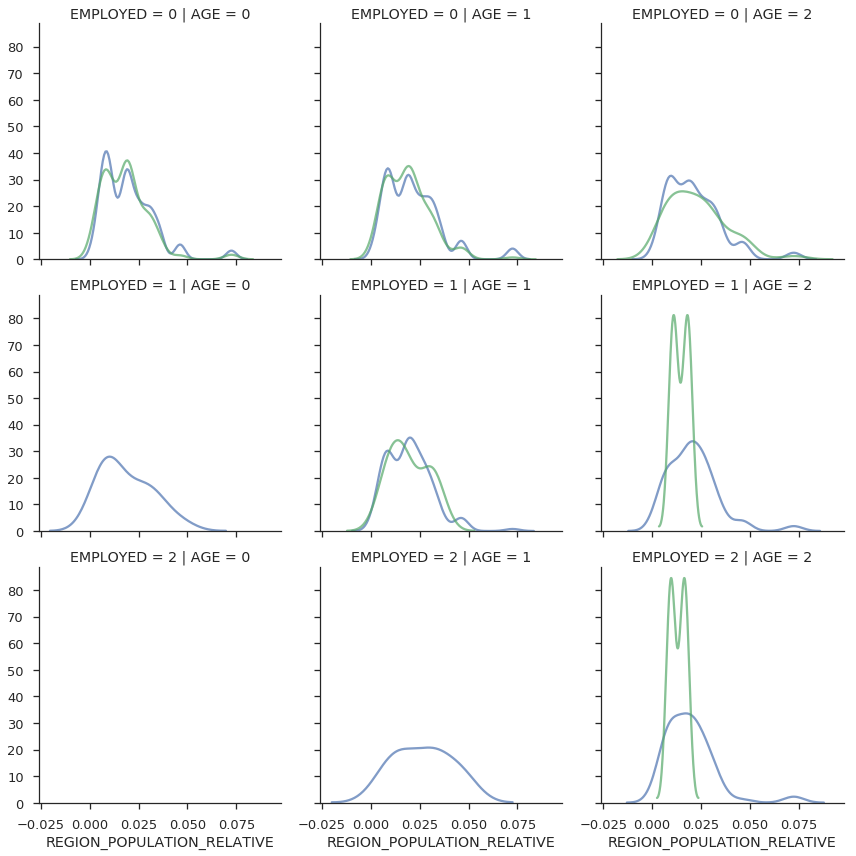

In [35]:
x = app_train.sample(n=10000)
x.loc[:, 'AGE'] = pd.cut(-x.DAYS_BIRTH/365, bins=3, labels=np.arange(3))
x.loc[:, 'EMPLOYED'] = pd.cut((-x.DAYS_EMPLOYED.replace({365243: np.nan})/365), bins=3, labels=np.arange(3))
g = sns.FacetGrid(data=x, col='AGE', row='EMPLOYED', hue='TARGET', size=4)
g = g.map(sns.kdeplot, 'REGION_POPULATION_RELATIVE', alpha=.7);

### Name Income Type: Clients income type (businessman, working, maternity leave

In [153]:
print('%age of missing values: {}'.format(app_train.NAME_INCOME_TYPE.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


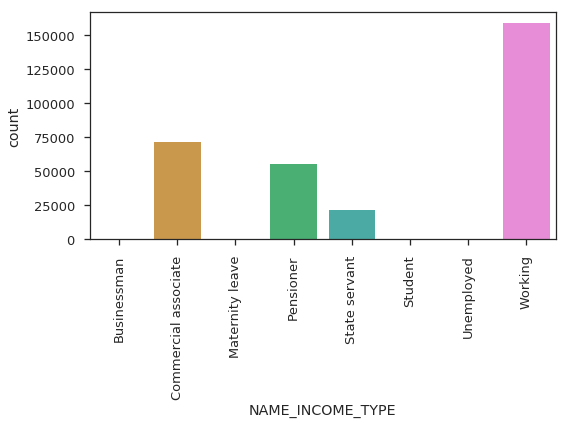

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.NAME_INCOME_TYPE)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship between Name Income Type and Target

In [46]:
ss = pd.crosstab(app_train.NAME_INCOME_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET                   0.0    1.0     ratio
NAME_INCOME_TYPE                             
Businessman               10      0  0.000000
Commercial associate   66257   5360  0.074843
Maternity leave            3      2  0.400000
Pensioner              52380   2982  0.053864
State servant          20454   1249  0.057550
Student                   18      0  0.000000
Unemployed                14      8  0.363636
Working               143550  15224  0.095885


### Name Type Suite: Who was accompanying the client when he was applying for loan

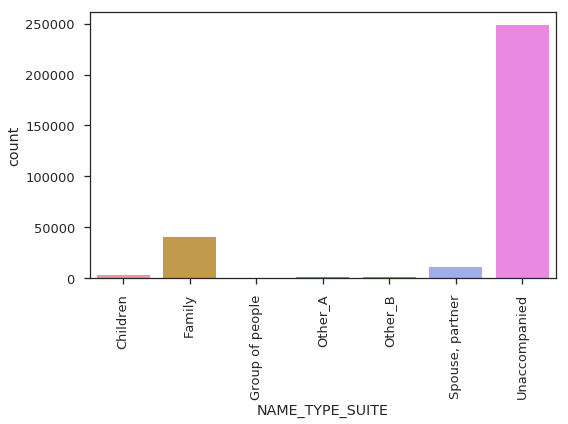

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.NAME_TYPE_SUITE)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship of Name Type Suite with Target

In [49]:
ss = pd.crosstab(app_train.NAME_TYPE_SUITE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET              0.0    1.0     ratio
NAME_TYPE_SUITE                         
Children           3026    241  0.073768
Family            37140   3009  0.074946
Group of people     248     23  0.084871
Other_A             790     76  0.087760
Other_B            1596    174  0.098305
Spouse, partner   10475    895  0.078716
Unaccompanied    228189  20337  0.081830


### Name Education Type: Level of highest education client has received

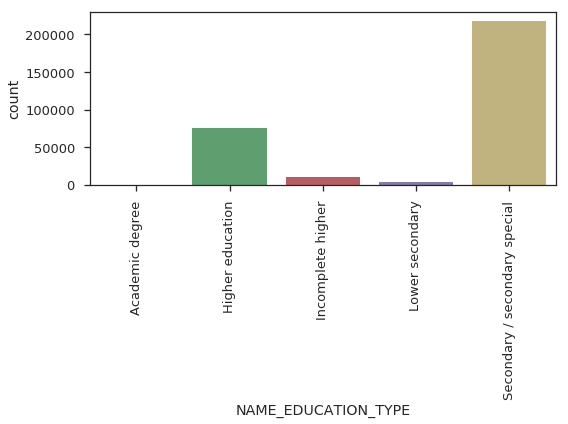

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship of Education Type with Target

In [51]:
ss = pd.crosstab(app_train.NAME_EDUCATION_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET                            0.0    1.0     ratio
NAME_EDUCATION_TYPE                                   
Academic degree                   161      3  0.018293
Higher education                70854   4009  0.053551
Incomplete higher                9405    872  0.084850
Lower secondary                  3399    417  0.109277
Secondary / secondary special  198867  19524  0.089399


** People with high education level tend not to default **

### NAME FAMILY STATUS: Family Status of the client

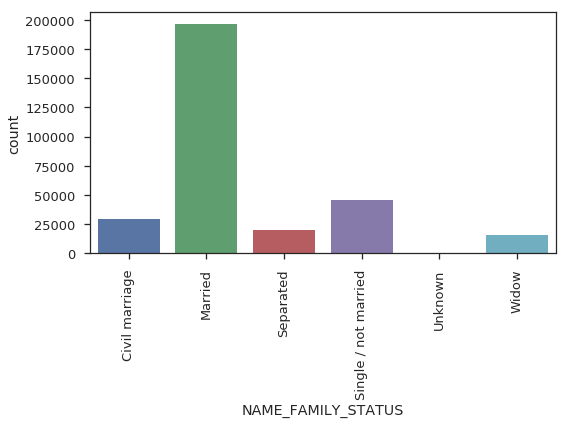

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.NAME_FAMILY_STATUS)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship of Family Status with Target

In [53]:
ss = pd.crosstab(app_train.NAME_FAMILY_STATUS, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET                   0.0    1.0     ratio
NAME_FAMILY_STATUS                           
Civil marriage         26814   2961  0.099446
Married               181582  14850  0.075599
Separated              18150   1620  0.081942
Single / not married   40987   4457  0.098077
Unknown                    2      0  0.000000
Widow                  15151    937  0.058242


### Name Housing Type: What is the housing situation of the client ?

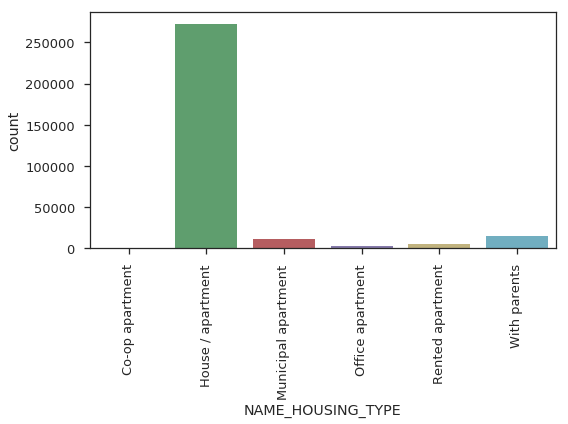

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.NAME_HOUSING_TYPE)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship of Name Housing Type with Target

In [55]:
ss = pd.crosstab(app_train.NAME_HOUSING_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET                  0.0    1.0     ratio
NAME_HOUSING_TYPE                           
Co-op apartment        1033     89  0.079323
House / apartment    251596  21272  0.077957
Municipal apartment   10228    955  0.085397
Office apartment       2445    172  0.065724
Rented apartment       4280    601  0.123131
With parents          13104   1736  0.116981


** People who don't own houses are more likely to default. **

### DAYS_REGISTRATION: How many days before the application did client change his registration ?

In [57]:
print('%age of missing values: {}'.format(app_train.DAYS_REGISTRATION.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


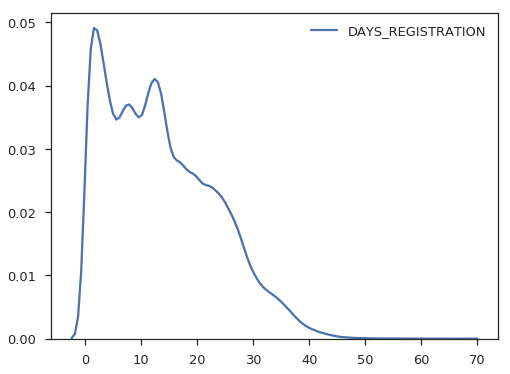

In [56]:
plt.figure(figsize=(8, 6))
sns.kdeplot(-app_train.DAYS_REGISTRATION/365);

** Most of the applicants have changed registration recently within a year. **

### Relationship of Days Registration with Target

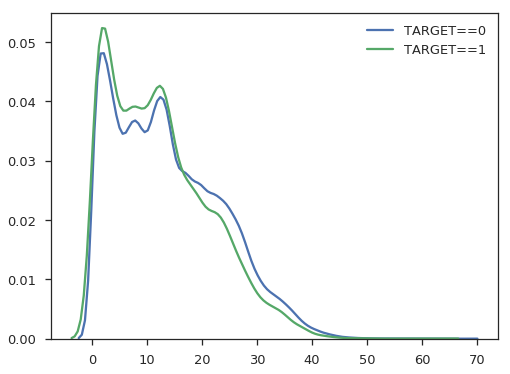

In [59]:
plt.figure(figsize=(8, 6))
sns.kdeplot((-app_train.DAYS_REGISTRATION/365)[app_train.TARGET == 0], label='TARGET==0')
sns.kdeplot((-app_train.DAYS_REGISTRATION/365)[app_train.TARGET == 1], label='TARGET==1');

** People who have changed their registration recently have higher chances of default. **

### DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan

In [60]:
print('%age of missing values: {}'.format(app_train.DAYS_ID_PUBLISH.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


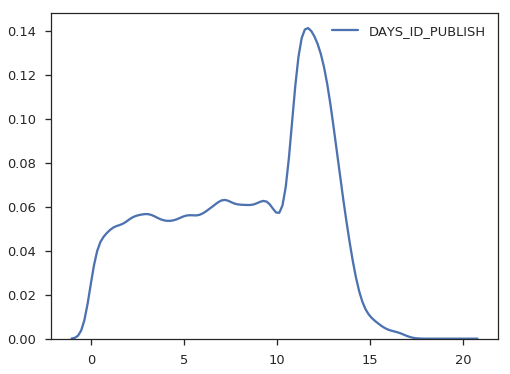

In [61]:
plt.figure(figsize=(8, 6))
sns.kdeplot(-app_train.DAYS_ID_PUBLISH/365);

### Relationship of DAYS_ID_PUBLISH with TARGET

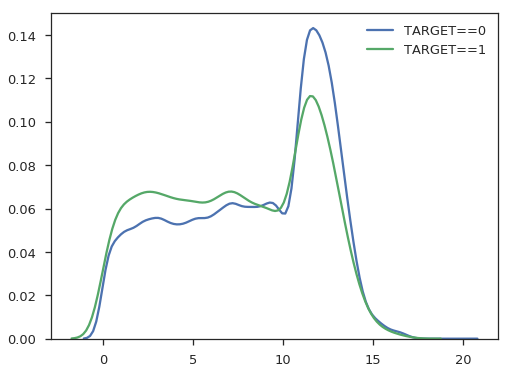

In [62]:
plt.figure(figsize=(8, 6))
sns.kdeplot((-app_train.DAYS_ID_PUBLISH/365)[app_train.TARGET == 0], label='TARGET==0')
sns.kdeplot((-app_train.DAYS_ID_PUBLISH/365)[app_train.TARGET == 1], label='TARGET==1');

** Similar story, clients who have recently changed their ID are more likely to default. **

### OWN_CAR_AGE: Age of client's car

In [63]:
print('%age of missing values: {}'.format(app_train.OWN_CAR_AGE.isnull().sum() / len(app_train) * 100))

%age of missing values: 65.9908100848425


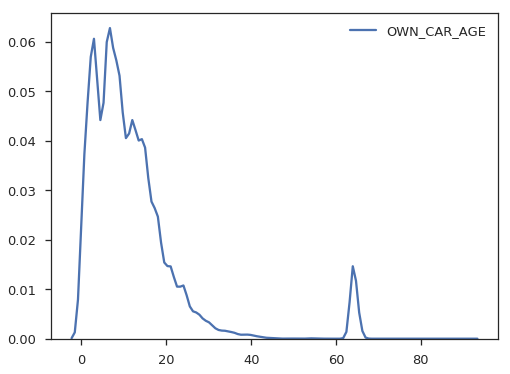

In [68]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.OWN_CAR_AGE);

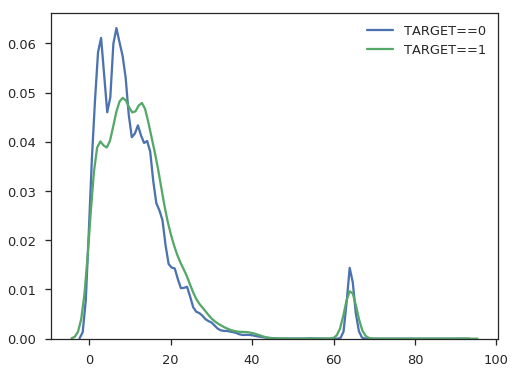

In [66]:
plt.figure(figsize=(8, 6))
sns.kdeplot((app_train.OWN_CAR_AGE)[app_train.TARGET == 0], label='TARGET==0')
sns.kdeplot((app_train.OWN_CAR_AGE)[app_train.TARGET == 1], label='TARGET==1');

** Clients who own car for more than 15 years are more likely to default. Last peak is how missing values were filled.**

### OCCUPATION_TYPE: What kind of occupation does the client have ?

In [70]:
print('%age of missing values: {}'.format(app_train.OCCUPATION_TYPE.isnull().sum() / len(app_train) * 100))

%age of missing values: 31.345545362604916


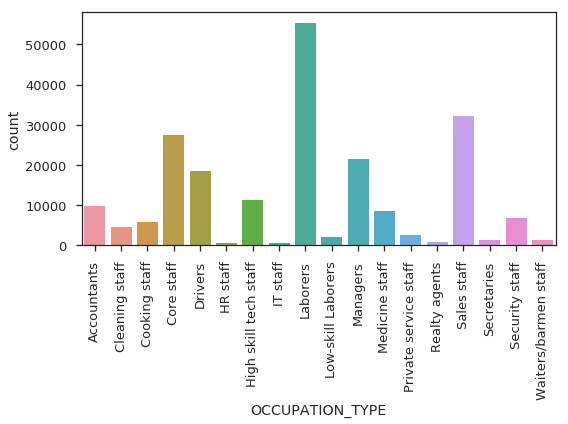

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship of occupation with target

In [75]:
ss = pd.crosstab(app_train.OCCUPATION_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET                   0.0   1.0     ratio
OCCUPATION_TYPE                             
Accountants             9339   474  0.048303
Cleaning staff          4206   447  0.096067
Cooking staff           5325   621  0.104440
Core staff             25832  1738  0.063040
Drivers                16496  2107  0.113261
HR staff                 527    36  0.063943
High skill tech staff  10679   701  0.061599
IT staff                 492    34  0.064639
Laborers               49348  5838  0.105788
Low-skill Laborers      1734   359  0.171524
Managers               20043  1328  0.062140
Medicine staff          7965   572  0.067002
Private service staff   2477   175  0.065988
Realty agents            692    59  0.078562
Sales staff            29010  3092  0.096318
Secretaries             1213    92  0.070498
Security staff          5999   722  0.107424
Waiters/barmen staff    1196   152  0.112760


### CNT_FAM_MEMBERS: How many family members does client have ?

In [76]:
print('%age of missing values: {}'.format(app_train.CNT_FAM_MEMBERS.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0006503832383231819


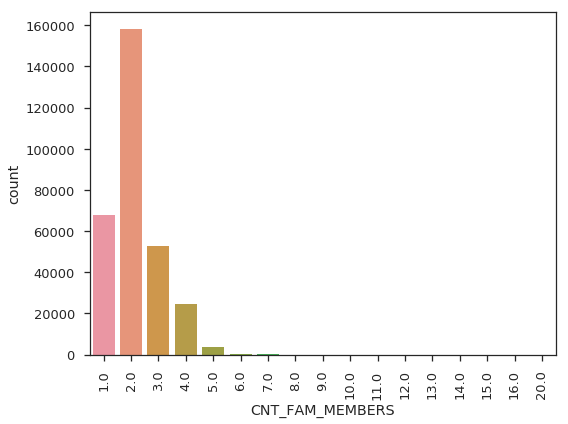

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(app_train.CNT_FAM_MEMBERS)
plt.xticks(rotation=90)
plt.tight_layout();

In [79]:
app_train.CNT_FAM_MEMBERS.describe()

count    307509.0
mean          NaN
std           0.0
min           1.0
25%           2.0
50%           2.0
75%           3.0
max          20.0
Name: CNT_FAM_MEMBERS, dtype: float64

### Relationship of count of family members with TARGET

In [80]:
ss = pd.crosstab(app_train.CNT_FAM_MEMBERS, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET              0.0    1.0     ratio
CNT_FAM_MEMBERS                         
1.0               62172   5675  0.083644
2.0              146348  12009  0.075835
3.0               47993   4608  0.087603
4.0               22561   2136  0.086488
5.0                3151    327  0.094020
6.0                 353     55  0.134804
7.0                  75      6  0.074074
8.0                  14      6  0.300000
9.0                   6      0  0.000000
10.0                  2      1  0.333333
11.0                  0      1  1.000000
12.0                  2      0  0.000000
13.0                  0      1  1.000000
14.0                  2      0  0.000000
15.0                  1      0  0.000000
16.0                  2      0  0.000000
20.0                  2      0  0.000000


### Organization Type: Type of organization where employee works

In [82]:
print('%age of missing values: {}'.format(app_train.ORGANIZATION_TYPE.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.0


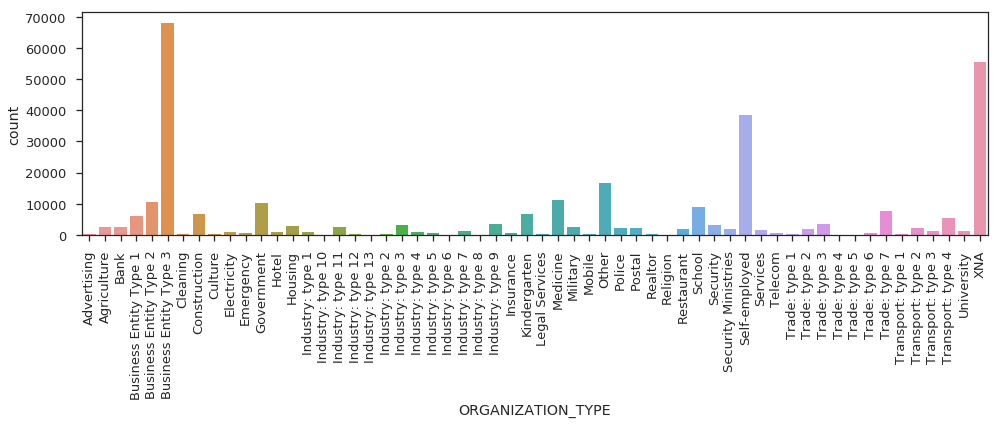

In [84]:
plt.figure(figsize=(14, 6))
sns.countplot(app_train.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.tight_layout();

### Relationship of organization type with TARGET

In [85]:
ss = pd.crosstab(app_train.ORGANIZATION_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET                    0.0   1.0     ratio
ORGANIZATION_TYPE                            
Advertising               394    35  0.081585
Agriculture              2197   257  0.104727
Bank                     2377   130  0.051855
Business Entity Type 1   5497   487  0.081384
Business Entity Type 2   9653   900  0.085284
Business Entity Type 3  61669  6323  0.092996
Cleaning                  231    29  0.111538
Construction             5936   785  0.116798
Culture                   358    21  0.055409
Electricity               887    63  0.066316
Emergency                 520    40  0.071429
Government               9678   726  0.069781
Hotel                     904    62  0.064182
Housing                  2723   235  0.079446
Industry: type 1          924   115  0.110683
Industry: type 10         102     7  0.064220
Industry: type 11        2470   234  0.086538
Industry: type 12         355    14  0.037940
Industry: type 13          58     9  0.134328
Industry: type 2          425    3

### OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE

In [97]:
app_train.loc[:, ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']].head()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE
0                       2.0                       2.0
1                       1.0                       0.0
2                       0.0                       0.0
3                       2.0                       0.0
4                       0.0                       0.0

In [87]:
app_train.loc[:, ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [90]:
pd.crosstab(app_train.OBS_30_CNT_SOCIAL_CIRCLE, app_train.DEF_30_CNT_SOCIAL_CIRCLE)

DEF_30_CNT_SOCIAL_CIRCLE    0.0    1.0   2.0   3.0   4.0   5.0   6.0   7.0   \
OBS_30_CNT_SOCIAL_CIRCLE                                                      
0.0                       163910      0     0     0     0     0     0     0   
1.0                        38211  10572     0     0     0     0     0     0   
2.0                        22122   6477  1209     0     0     0     0     0   
3.0                        14959   3839  1362   162     0     0     0     0   
4.0                        10429   2532   893   259    30     0     0     0   
5.0                         7060   1614   605   226    42     6     0     0   
6.0                         4837   1004   399   159    44     9     1     0   
7.0                         3162    780   287   110    41     9     1     0   
8.0                         2185    493   175    82    21    10     1     0   
9.0                         1451    332   112    71    22    13     2     0   
10.0                        1012    207    97    45    11     3     1     0   
11.0                         603    150    60    23    15     1     0     0   
12.0                         465    117    42    15     9     4     0     0   
13.0                         294     68    28    12     6     1     2     0   
14.0                         183     38    20    11     5     0     0     0   
15.0                         117     26    12     8     3     0     0     0   
16.0                          91     31     8     1     1     0     0     1   
17.0                          65     16     5     2     0     0     0     0   
18.0                          34      8     1     3     0     0     0     0   
19.0                          35      8     0     1     0     0     0     0   
20.0                          22      6     1     1     0     0     0     0   
21.0                          21      2     3     1     2     0     0     0   
22.0                          17      3     2     0     0     0     0     0   
23.0                          10      1     1     0     0     0     3     0   
24.0                           9      2     0     0     0     0     0     0   
25.0                          10      0     0     0     1     0     0     0   
26.0                           2      0     1     0     0     0     0     0   
27.0                           3      2     0     0     0     0     0     0   
28.0                           1      0     0     0     0     0     0     0   
29.0                           1      0     0     0     0     0     0     0   
30.0                           2      0     0     0     0     0     0     0   
47.0                           1      0     0     0     0     0     0     0   
348.0                          0      0     0     0     0     0     0     0   

DEF_30_CNT_SOCIAL_CIRCLE  8.0   34.0  
OBS_30_CNT_SOCIAL_CIRCLE              
0.0                          0     0  
1.0                          0     0  
2.0                          0     0  
3.0                          0     0  
4.0                          0     0  
5.0                          0     0  
6.0                          0     0  
7.0                          0     0  
8.0                          0     0  
9.0                          0     0  
10.0                         0     0  
11.0                         0     0  
12.0                         0     0  
13.0                         0     0  
14.0                         1     0  
15.0                         0     0  
16.0                         0     0  
17.0                         0     0  
18.0                         0     0  
19.0                         0     0  
20.0                         0     0  
21.0                         0     0  
22.0                         0     0  
23.0                         0     0  
24.0                         0     0  
25.0                         0     0  
26.0                         0     0  
27.0                         0     0  
28.0                         0     0  
29.0                     

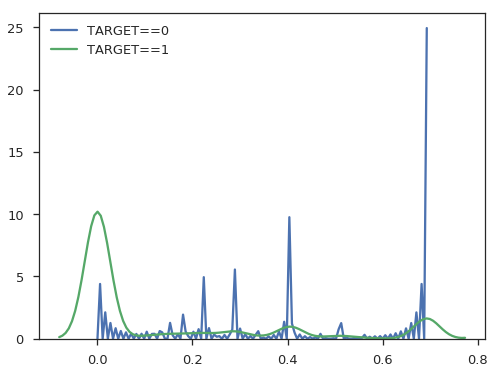

In [146]:
plt.figure(figsize=(8, 6))
x=app_train

x.loc[:, 'diff']  = x.OBS_30_CNT_SOCIAL_CIRCLE - x.DEF_30_CNT_SOCIAL_CIRCLE
x.loc[:, 'ratio'] = x.DEF_30_CNT_SOCIAL_CIRCLE.div(x.OBS_30_CNT_SOCIAL_CIRCLE)

sns.kdeplot((x.ratio)[x.TARGET == 0].map(np.log1p), label='TARGET==0')
sns.kdeplot((x.ratio)[x.TARGET == 1].map(np.log1p), label='TARGET==1');

In [96]:
app_train.loc[:, ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].head()

OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE
0                       2.0                       2.0
1                       1.0                       0.0
2                       0.0                       0.0
3                       2.0                       0.0
4                       0.0                       0.0

In [94]:
app_train.loc[:, ['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

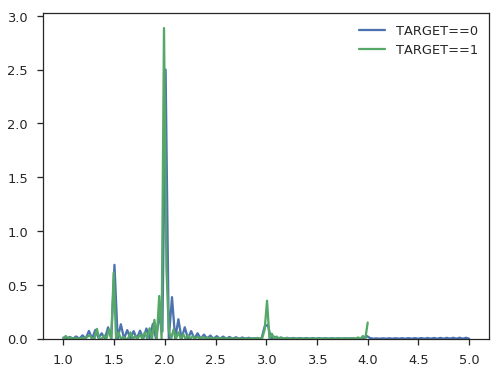

In [110]:
plt.figure(figsize=(8, 6))
x=app_train

x.loc[:, 'diff_obs_def']  = x.DEF_30_CNT_SOCIAL_CIRCLE.subtract(x.DEF_60_CNT_SOCIAL_CIRCLE)
x.loc[:, 'ratio_obs_def'] = x.DEF_30_CNT_SOCIAL_CIRCLE.div(x.DEF_60_CNT_SOCIAL_CIRCLE)

sns.kdeplot((x.ratio_obs_def)[x.TARGET == 0], label='TARGET==0')
sns.kdeplot((x.ratio_obs_def)[x.TARGET == 1], label='TARGET==1');

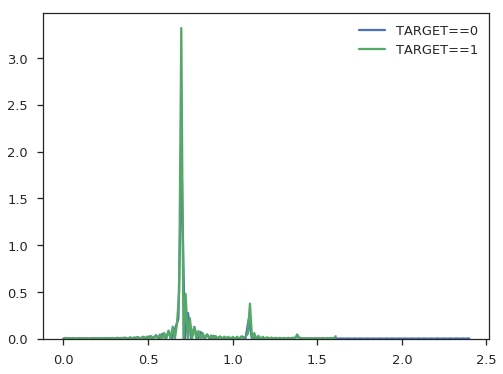

In [112]:
plt.figure(figsize=(8, 6))

sns.kdeplot((x.diff_obs_def)[x.TARGET == 0].map(np.log1p), label='TARGET==0')
sns.kdeplot((x.diff_obs_def)[x.TARGET == 1].map(np.log1p), label='TARGET==1');

### AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

In [115]:
app_train.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [116]:
app_train.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [117]:
app_train.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [118]:
app_train.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [125]:
ss = pd.crosstab(app_train.AMT_REQ_CREDIT_BUREAU_YEAR
                 , app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)
del ss
gc.collect();

TARGET                        0.0   1.0     ratio
AMT_REQ_CREDIT_BUREAU_YEAR                       
0.0                         66678  5123  0.071350
1.0                         58755  4650  0.073338
2.0                         46124  4068  0.081049
3.0                         30952  2676  0.079577
4.0                         19004  1710  0.082553
5.0                         11049  1003  0.083223
6.0                          6335   632  0.090713
7.0                          3513   356  0.092013
8.0                          1944   183  0.086037
9.0                           977   119  0.108577
10.0                           19     3  0.136364
11.0                           29     2  0.064516
12.0                           28     2  0.066667
13.0                           18     1  0.052632
14.0                            7     3  0.300000
15.0                            6     0  0.000000
16.0                            2     1  0.333333
17.0                            7     0  0.000000


0.36703077288292124


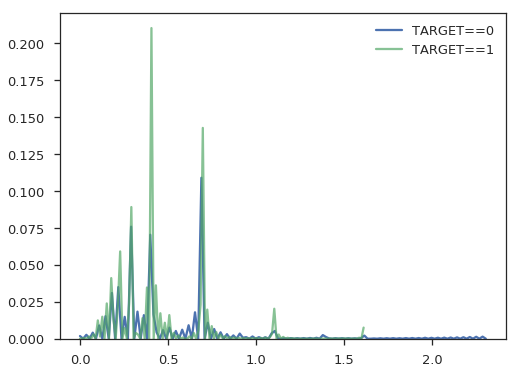

In [152]:
plt.figure(figsize=(8, 6))
x=app_train

x.loc[:, 'ratio'] = x.AMT_REQ_CREDIT_BUREAU_HOUR.div(x.AMT_REQ_CREDIT_BUREAU_YEAR)
print(x[x.ratio.isnull()].shape[0] / len(x))

sns.kdeplot((x.ratio_call_qrt_year)[x.TARGET == 0].map(np.log1p), label='TARGET==0')
sns.kdeplot((x.ratio_call_qrt_year)[x.TARGET == 1].map(np.log1p), alpha=.7, label='TARGET==1');

### Documents provided by user

In [158]:
num_documents_provided = app_train.loc[:, [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]].sum(axis=1)

ss = pd.crosstab(num_documents_provided, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[0] / (ss[0] + ss[1])
print(ss)

TARGET     0.0    1.0    ratio
row_0                         
0        27917   1632  0.94477
1       247239  22817  0.91551
2         7383    359  0.95363
3          147     16  0.90184
4            0      1  0.00000


### EXT_SOURCE_1: Normalized score from external data source

In [159]:
print('%age of missing values: {}'.format(app_train.EXT_SOURCE_1.isnull().sum() / len(app_train) * 100))

%age of missing values: 56.381072546998325


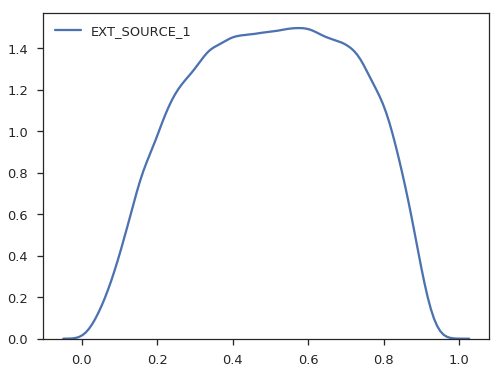

In [160]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.EXT_SOURCE_1);

### Relationship of EXT_SOURCE_1 with TARGET

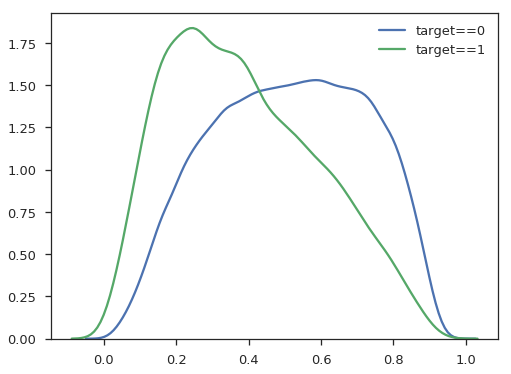

In [161]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train[app_train.TARGET == 0].EXT_SOURCE_1, label='target==0')
sns.kdeplot(app_train[app_train.TARGET == 1].EXT_SOURCE_1, label='target==1');

### EXT_SOURCE_2

In [162]:
print('%age of missing values: {}'.format(app_train.EXT_SOURCE_2.isnull().sum() / len(app_train) * 100))

%age of missing values: 0.21462646864665005


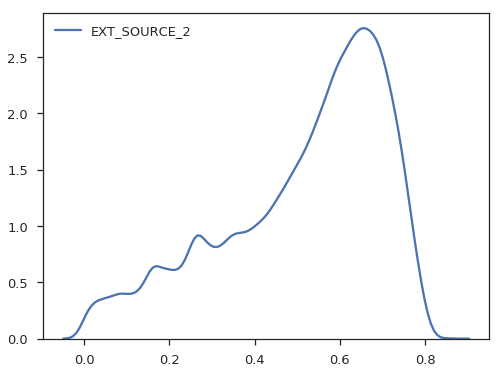

In [163]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.EXT_SOURCE_2);

### Relationship between EXT_SOURCE_2 and 3 across train and test set.

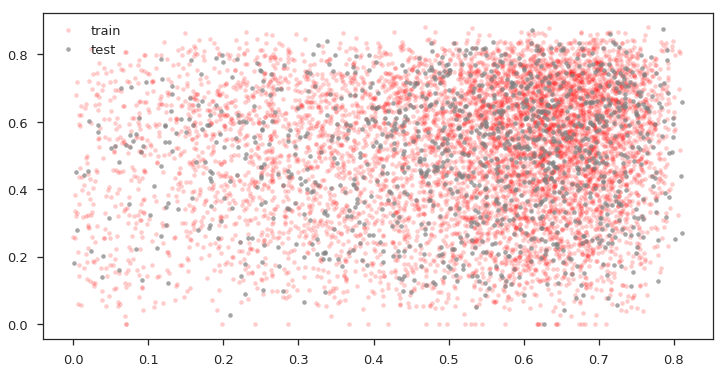

In [22]:
x = pd.concat((app_train, app_test))
x.loc[:, 'class_mode'] = 'train'
x.iloc[len(app_train):]['class_mode'] = 'test'
x = x.sample(n=10000)

plt.figure(figsize=(12, 6))
plt.plot(x[x.class_mode == 'train'].EXT_SOURCE_2, x[x.class_mode=='train'].EXT_SOURCE_3, '.', alpha=.2, c='r', label='train')
plt.plot(x[x.class_mode == 'test'].EXT_SOURCE_2, x[x.class_mode=='test'].EXT_SOURCE_3, '.', alpha=.7, c='gray', label='test')
plt.legend(loc='best');

### Relationship of EXT_SOURCE_2 with TARGET

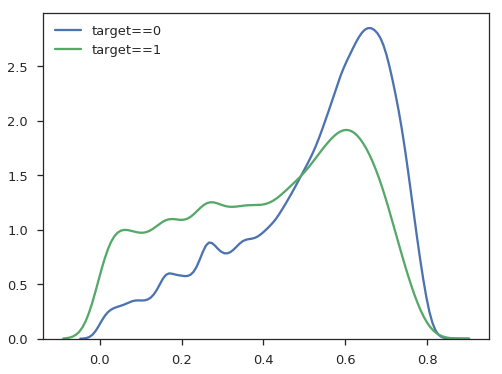

In [164]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train[app_train.TARGET == 0].EXT_SOURCE_2, label='target==0')
sns.kdeplot(app_train[app_train.TARGET == 1].EXT_SOURCE_2, label='target==1');

### EXT_SOURCE_3

In [165]:
print('%age of missing values: {}'.format(app_train.EXT_SOURCE_3.isnull().sum() / len(app_train) * 100))

%age of missing values: 19.825307062186393


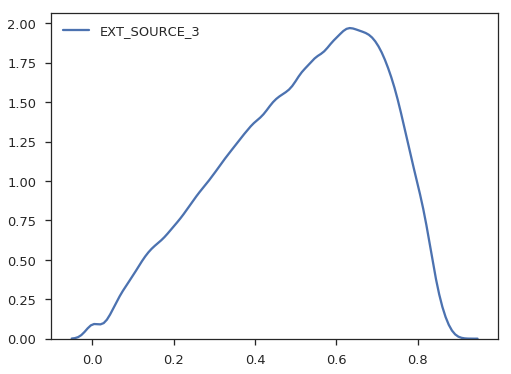

In [166]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train.EXT_SOURCE_3);

### Relationship of EXT_SOURCE_3 with Target

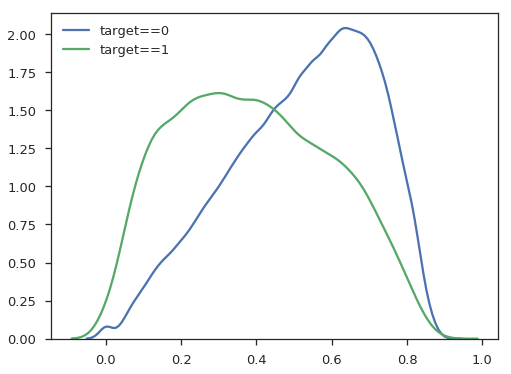

In [167]:
plt.figure(figsize=(8, 6))
sns.kdeplot(app_train[app_train.TARGET == 0].EXT_SOURCE_3, label='target==0')
sns.kdeplot(app_train[app_train.TARGET == 1].EXT_SOURCE_3, label='target==1');

### Relationship between AMT_CREDIT, AMT_ANNUITY, AGE and Target

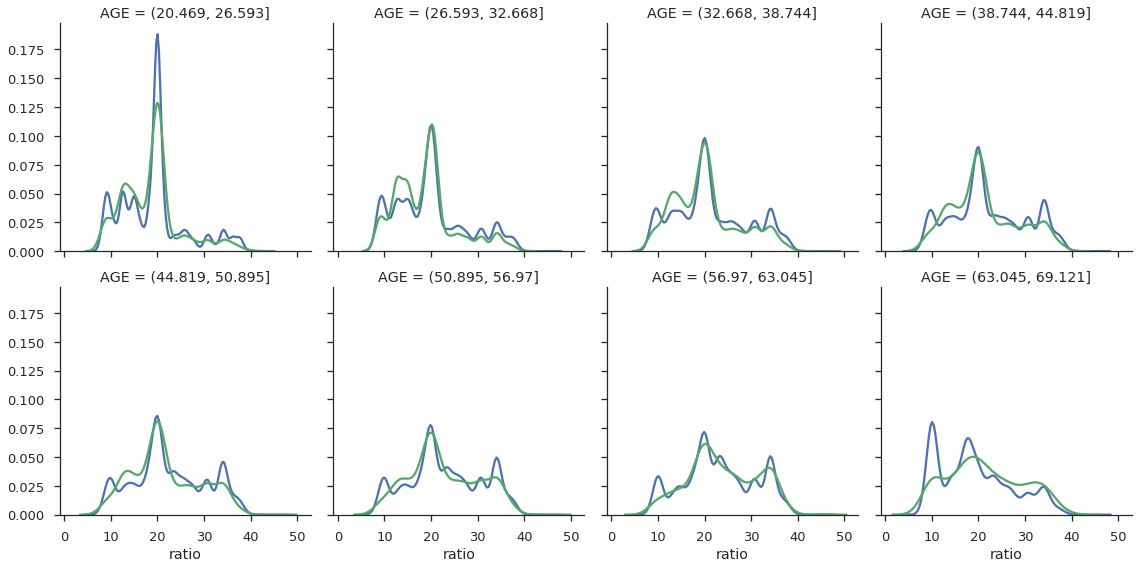

In [10]:
x = app_train
x.loc[:, 'AGE']   = pd.cut(-x.DAYS_BIRTH/365, bins=8)
x.loc[:, 'ratio'] = x.AMT_CREDIT / x.AMT_ANNUITY

g = sns.FacetGrid(data=x,
                  col='AGE',
                  hue='TARGET',
                  size=4,
                  col_wrap=4
                 )
g = g.map(sns.kdeplot, 'ratio');

### Relationship between AMT_CREDIT, AMT_ANNUITY, DAYS_REGISTRATION, Target

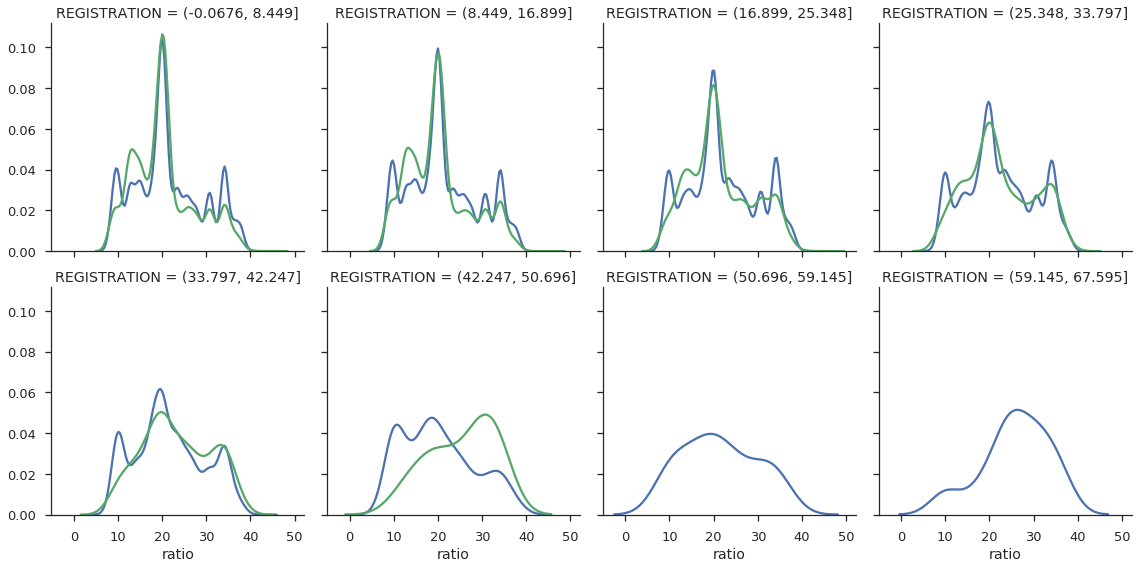

In [13]:
x = app_train
x.loc[:, 'REGISTRATION'] = pd.cut(-x.DAYS_REGISTRATION/365, bins=8)
x.loc[:, 'ratio']        = x.AMT_CREDIT / x.AMT_ANNUITY

g = sns.FacetGrid(data=x,
                  col='REGISTRATION',
                  hue='TARGET',
                  size=4,
                  col_wrap=4
                 )
g = g.map(sns.kdeplot, 'ratio');

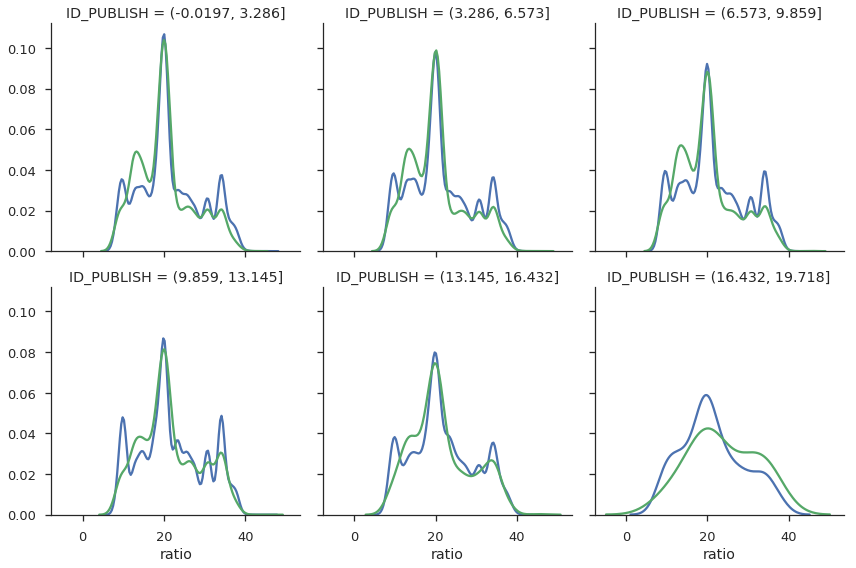

In [14]:
x = app_train
x.loc[:, 'ID_PUBLISH'] = pd.cut(-x.DAYS_ID_PUBLISH/365, bins=6)
x.loc[:, 'ratio']      = x.AMT_CREDIT / x.AMT_ANNUITY

g = sns.FacetGrid(data=x,
                  col='ID_PUBLISH',
                  hue='TARGET',
                  size=4,
                  col_wrap=3
                 )
g = g.map(sns.kdeplot, 'ratio');

### Relationship between AMT_CREDIT, ANNUITY, CNT_FAM_Members and TARGET

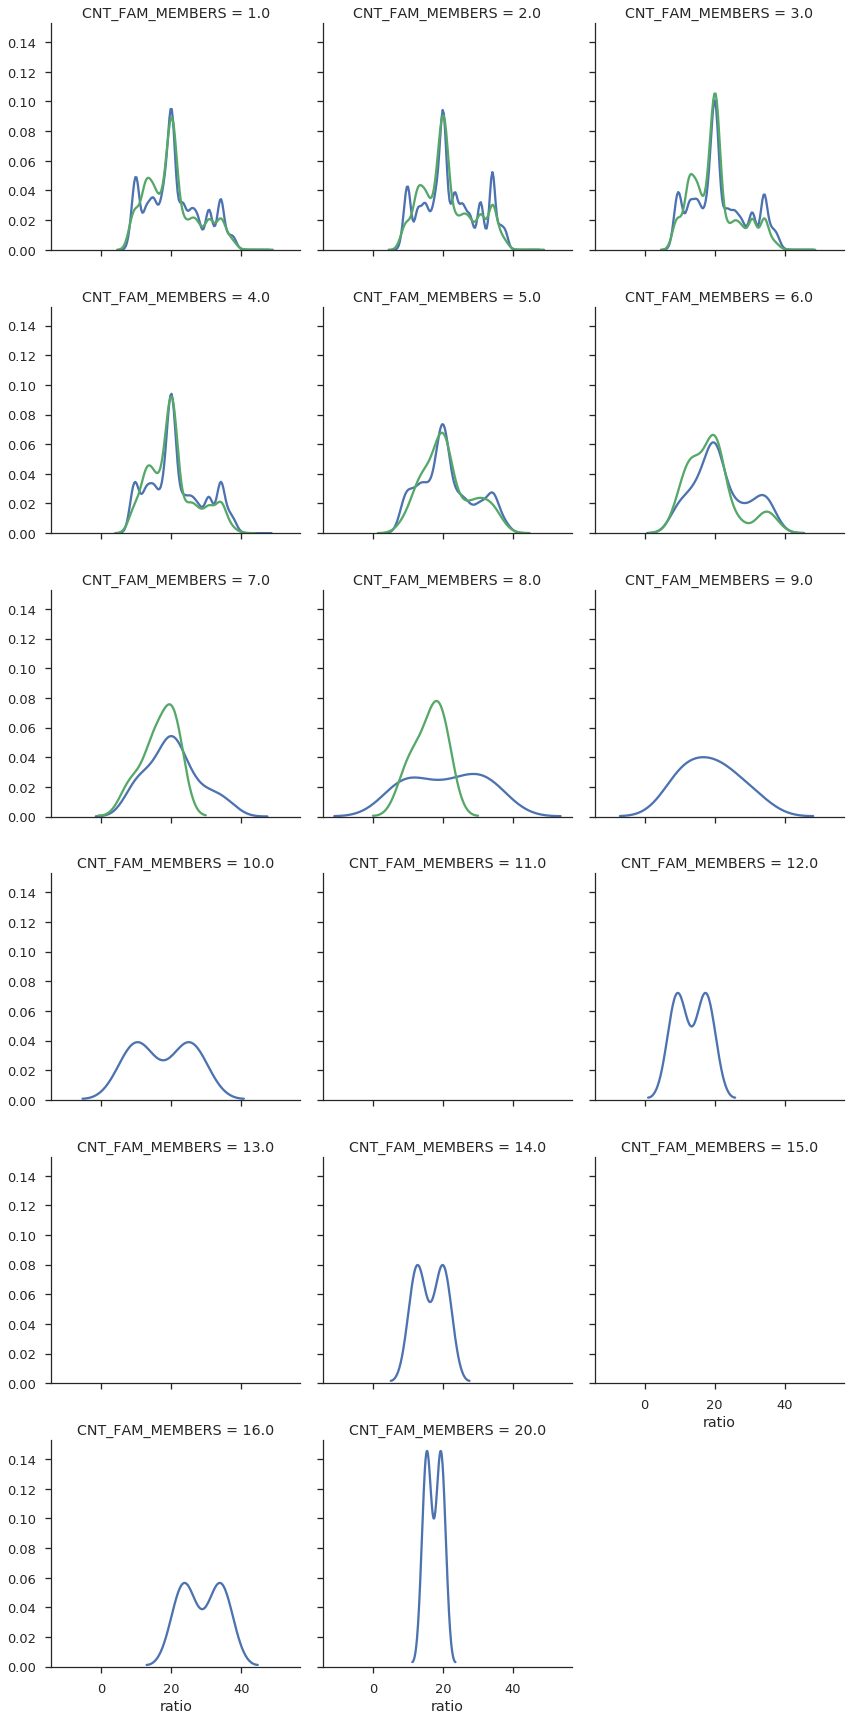

In [13]:
x = app_train
x.loc[:, 'ratio']      = x.AMT_CREDIT / x.AMT_ANNUITY

g = sns.FacetGrid(data=x,
                  col='CNT_FAM_MEMBERS',
                  hue='TARGET',
                  size=4,
                  col_wrap=3
                 )

g = g.map(sns.kdeplot, 'ratio');

### Relationship between AMT_CREDIT, AMT_ANNUITY, EXT_SOURCE_2, AGE and Target

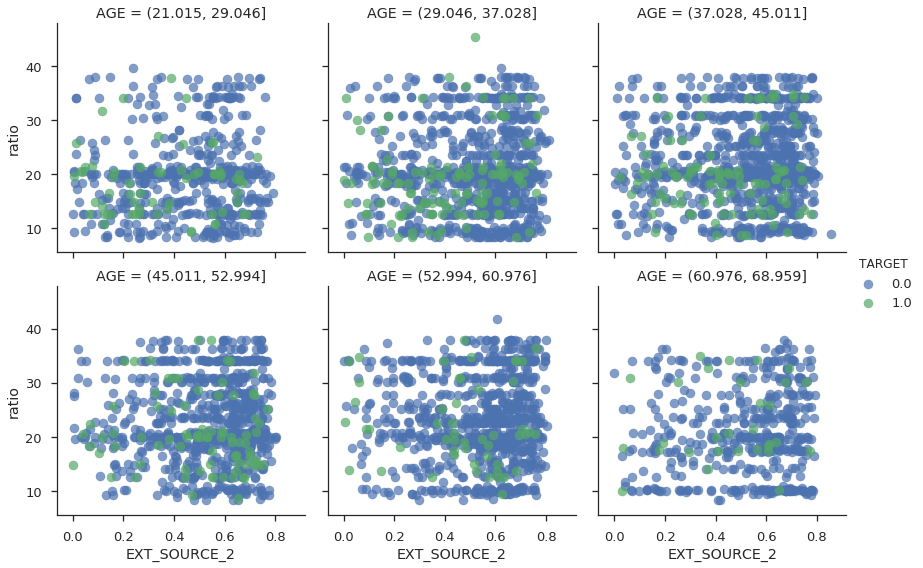

In [6]:
x = app_train.sample(n=5000)
x.loc[:, 'AGE']    = pd.cut(-x.DAYS_BIRTH/365, bins=6)
x.loc[:, 'ratio']  = x.AMT_CREDIT / x.AMT_ANNUITY

g = sns.FacetGrid(data=x,
                  col='AGE',
                  hue='TARGET',
                  size=4,
                  col_wrap=3
                 )
g = g.map(plt.scatter, 'EXT_SOURCE_2', 'ratio', alpha=.7).add_legend();

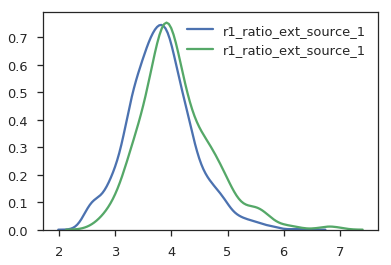

In [12]:
x.loc[:, 'r1_ratio_ext_source_1'] = x.ratio / x.EXT_SOURCE_1
x.loc[:, 'r2_ratio_ext_source_1'] = x.ratio * x.EXT_SOURCE_1

sns.kdeplot(x.r1_ratio_ext_source_1[x.TARGET==0].map(np.log1p))
sns.kdeplot(x.r1_ratio_ext_source_1[x.TARGET==1].map(np.log1p));

### Relationship between AMT_CREDIT, ANNUITY, INCOME and Target

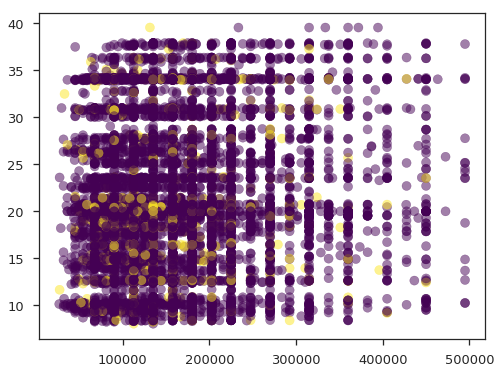

In [18]:
plt.figure(figsize=(8, 6))
x = app_train.loc[app_train.AMT_INCOME_TOTAL < 5e5].sample(n=10000)
x.loc[:, 'ratio'] = x.AMT_CREDIT / x.AMT_ANNUITY

plt.scatter(x.AMT_INCOME_TOTAL, x.ratio, c=x.TARGET, cmap='viridis', alpha=.5);

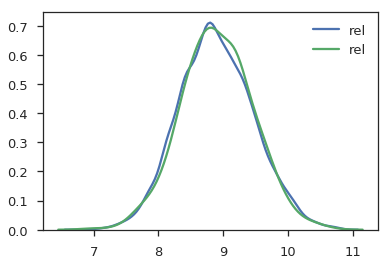

In [22]:
x.loc[:, 'rel'] = x.AMT_INCOME_TOTAL / x.ratio

sns.kdeplot(x[x.TARGET == 0]['rel'].map(np.log1p))
sns.kdeplot(x[x.TARGET == 1]['rel'].map(np.log1p));

## Previous applications

In [4]:
prev_app.head().T

0                 1  \
SK_ID_PREV                                    2030495           2802425   
SK_ID_CURR                                     271877            108129   
NAME_CONTRACT_TYPE                     Consumer loans        Cash loans   
AMT_ANNUITY                                   1730.43           25188.6   
AMT_APPLICATION                                 17145            607500   
AMT_CREDIT                                      17145            679671   
AMT_DOWN_PAYMENT                                    0               NaN   
AMT_GOODS_PRICE                                 17145            607500   
WEEKDAY_APPR_PROCESS_START                   SATURDAY          THURSDAY   
HOUR_APPR_PROCESS_START                            15                11   
FLAG_LAST_APPL_PER_CONTRACT                         Y                 Y   
NFLAG_LAST_APPL_IN_DAY                              1                 1   
RATE_DOWN_PAYMENT                                   0               NaN   
RATE_INTEREST_PRIMARY                        0.182861               NaN   
RATE_INTEREST_PRIVILEGED                     0.867188               NaN   
NAME_CASH_LOAN_PURPOSE                            XAP               XNA   
NAME_CONTRACT_STATUS                         Approved          Approved   
DAYS_DECISION                                     -73              -164   
NAME_PAYMENT_TYPE               Cash through the bank               XNA   
CODE_REJECT_REASON                                XAP               XAP   
NAME_TYPE_SUITE                                   NaN     Unaccompanied   
NAME_CLIENT_TYPE                             Repeater          Repeater   
NAME_GOODS_CATEGORY                            Mobile               XNA   
NAME_PORTFOLIO                                    POS              Cash   
NAME_PRODUCT_TYPE                                 XNA            x-sell   
CHANNEL_TYPE                             Country-wide    Contact center   
SELLERPLACE_AREA                                   35                -1   
NAME_SELLER_INDUSTRY                     Connectivity               XNA   
CNT_PAYMENT                                        12                36   
NAME_YIELD_GROUP                               middle        low_action   
PRODUCT_COMBINATION          POS mobile with interest  Cash X-Sell: low   
DAYS_FIRST_DRAWING                             365243            365243   
DAYS_FIRST_DUE                                    -42              -134   
DAYS_LAST_DUE_1ST_VERSION                         300               916   
DAYS_LAST_DUE                                     -42            365243   
DAYS_TERMINATION                                  -37            365243   
NFLAG_INSURED_ON_APPROVAL                           0                 1   

                                                   2                        3  \
SK_ID_PREV                                   2523466                  2819243   
SK_ID_CURR                                    122040                   176158   
NAME_CONTRACT_TYPE                        Cash loans               Cash loans   
AMT_ANNUITY                                  15060.7                  47041.3   
AMT_APPLICATION                               112500                   450000   
AMT_CREDIT                                    136444                   470790   
AMT_DOWN_PAYMENT                                 NaN                      NaN   
AMT_GOODS_PRICE                               112500                   450000   
WEEKDAY_APPR_PROCESS_START                   TUESDAY                   MONDAY   
HOUR_APPR_PROCESS_START                           11                        7   
FLAG_LAST_APPL_PER_CONTRACT                        Y                        Y   
NFLAG_LAST_APPL_IN_DAY                             1                        1   
RATE_DOWN_PAYMENT                                NaN                      NaN   
RATE_INTEREST_PRIMARY                            NaN               

### Name Contract Type

In [13]:
print('%age of missing values: {}'.format(prev_app.NAME_CONTRACT_TYPE.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [5]:
prev_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

### AMT_ANNUITY

In [14]:
print('%age of missing values: {}'.format(prev_app.AMT_ANNUITY.isnull().sum() / len(prev_app) * 100))

%age of missing values: 22.286665062081866


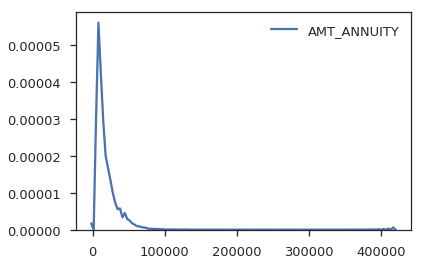

In [7]:
sns.kdeplot(prev_app.AMT_ANNUITY);

### AMT_APPLICATION

In [15]:
print('%age of missing values: {}'.format(prev_app.AMT_APPLICATION.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


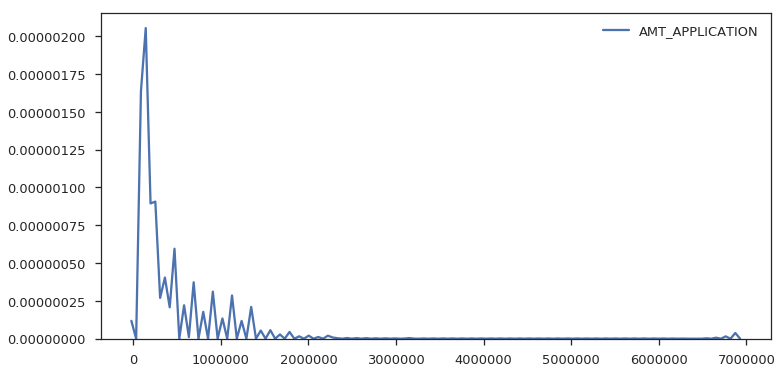

In [10]:
plt.figure(figsize=(12, 6))
sns.kdeplot(prev_app.AMT_APPLICATION);

### AMT_CREDIT

In [16]:
print('%age of missing values: {}'.format(prev_app.AMT_CREDIT.isnull().sum() / len(prev_app) * 100))

%age of missing values: 5.9872567227912114e-05


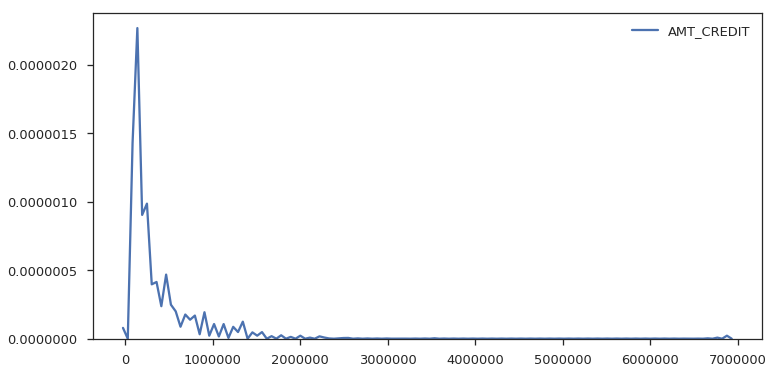

In [11]:
plt.figure(figsize=(12, 6))
sns.kdeplot(prev_app.AMT_CREDIT);

### AMT_GOODS_PRICE

In [17]:
print('%age of missing values: {}'.format(prev_app.AMT_GOODS_PRICE.isnull().sum() / len(prev_app) * 100))

%age of missing values: 23.08177275486854


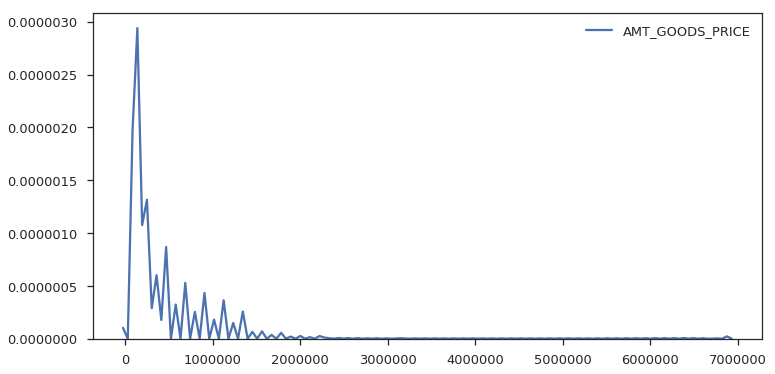

In [18]:
plt.figure(figsize=(12, 6))
sns.kdeplot(prev_app.AMT_GOODS_PRICE);

### AMT_DOWN_PAYMENT

In [19]:
print('%age of missing values: {}'.format(prev_app.AMT_DOWN_PAYMENT.isnull().sum() / len(prev_app) * 100))

%age of missing values: 53.636480115721696


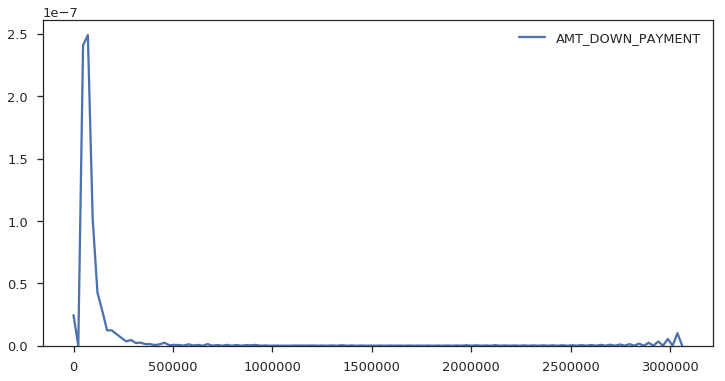

In [20]:
plt.figure(figsize=(12, 6))
sns.kdeplot(prev_app.AMT_DOWN_PAYMENT);

### WEEKDAY_APPR_PROCESS_START

In [21]:
print('%age of missing values: {}'.format(prev_app.WEEKDAY_APPR_PROCESS_START.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [22]:
prev_app.WEEKDAY_APPR_PROCESS_START.value_counts(dropna=False)

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

### HOUR_APPR_PROCESS_START

In [23]:
print('%age of missing values: {}'.format(prev_app.HOUR_APPR_PROCESS_START.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [24]:
prev_app.HOUR_APPR_PROCESS_START.value_counts(dropna=False)

11    192728
12    185980
10    181690
13    172256
14    157711
15    142965
9     127002
16    121361
17     95064
8      73085
18     64156
7      45646
19     34089
6      25759
5      15392
20     14535
4       9319
3       5035
21      4082
2       1116
22       720
1        212
23       202
0        109
Name: HOUR_APPR_PROCESS_START, dtype: int64

### FLAG_LAST_APPL_PER_CONTRACT

In [26]:
print('%age of missing values: {}'.format(prev_app.FLAG_LAST_APPL_PER_CONTRACT.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [25]:
prev_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

### Name Goods Category

In [27]:
print('%age of missing values: {}'.format(prev_app.NAME_GOODS_CATEGORY.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [28]:
prev_app.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

### NAME_PORTFOLIO

In [29]:
print('%age of missing values: {}'.format(prev_app.NAME_PORTFOLIO.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [30]:
prev_app.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

### NAME_PRODUCT_TYPE

In [4]:
print('%age of missing values: {}'.format(prev_app.NAME_PRODUCT_TYPE.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [5]:
prev_app.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

### CHANNEL_TYPE

In [6]:
print('%age of missing values: {}'.format(prev_app.CHANNEL_TYPE.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [7]:
prev_app.CHANNEL_TYPE.value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

### NAME_SELLER_INDUSTRY

In [8]:
print('%age of missing values: {}'.format(prev_app.NAME_SELLER_INDUSTRY.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [9]:
prev_app.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

### NAME_YIELD_GROUP

In [12]:
print('%age of missing values: {}'.format(prev_app.NAME_YIELD_GROUP.isnull().sum() / len(prev_app) * 100))

%age of missing values: 0.0


In [13]:
prev_app.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

### CNT_PAYMENT

In [14]:
print('%age of missing values: {}'.format(prev_app.CNT_PAYMENT.isnull().sum() / len(prev_app) * 100))

%age of missing values: 22.286365699245724


In [15]:
prev_app.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.0         3
44.0         2
39.0         2
38.0         2
46.0         2
40.0         1
33.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

### Relationship of CNT_PAYMENT of previous applications with TARGET

In [24]:
x = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
         .merge(prev_app.loc[:, ['SK_ID_CURR', 
                                 'SK_ID_PREV', 
                                 'NAME_CONTRACT_STATUS', 
                                 'CNT_PAYMENT']], how='left'); x.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_STATUS  CNT_PAYMENT
0      100002     1.0   1038818.0             Approved         24.0
1      100003     0.0   1810518.0             Approved         12.0
2      100003     0.0   2636178.0             Approved          6.0
3      100003     0.0   2396755.0             Approved         12.0
4      100004     0.0   1564014.0             Approved          4.0

In [10]:
ss = pd.crosstab(x.CNT_PAYMENT, x.TARGET)
ss = ss.sort_values(by=0, ascending=False)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

TARGET          0.0    1.0     ratio
CNT_PAYMENT                         
12.0         254401  20857  0.075773
6.0          151248  11512  0.070730
10.0         113864   8682  0.070847
0.0          109589  12396  0.101619
24.0         106924   9853  0.084374
18.0          60010   5522  0.084264
36.0          54474   6370  0.104694
60.0          41081   4616  0.101013
48.0          35574   5135  0.126139
8.0           24054   2063  0.078991
4.0           21901   1459  0.062457
30.0          13240   1359  0.093089
14.0           6467    721  0.100306
42.0           5623    606  0.097287
16.0           4395    387  0.080928
5.0            3275    215  0.061605
54.0           1655    198  0.106854
20.0           1498    115  0.071296
7.0            1200     82  0.063963
9.0            1055     63  0.056351
3.0             890     54  0.057203
15.0            769     68  0.081243
11.0            544     38  0.065292
72.0            114      9  0.073171
13.0             41      7  0.145833
2

In [12]:
res = x.groupby('SK_ID_CURR')['CNT_PAYMENT'].skew()
res = app_train.SK_ID_CURR.map(res)

print(res[res.isnull()].shape[0] / len(res))

0.4478701574903012


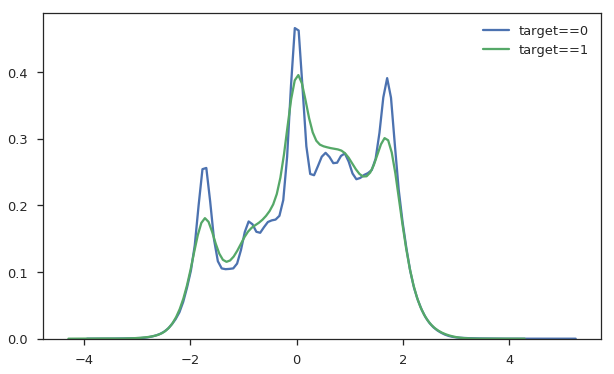

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res[app_train.TARGET == 0], label='target==0')
sns.kdeplot(res[app_train.TARGET == 1], label='target==1');

In [15]:
res = x.groupby('SK_ID_CURR')['CNT_PAYMENT'].mean()
res = app_train.SK_ID_CURR.map(res)

print(res[res.isnull()].shape[0] / len(res))

0.05485657423636878


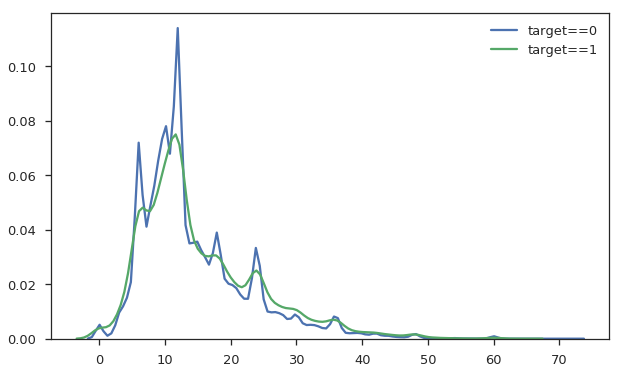

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res[app_train.TARGET == 0], label='target==0')
sns.kdeplot(res[app_train.TARGET == 1], label='target==1');

In [17]:
res = x.groupby('SK_ID_CURR')['CNT_PAYMENT'].median()
res = app_train.SK_ID_CURR.map(res)

print(res[res.isnull()].shape[0] / len(res))

0.05485657423636878


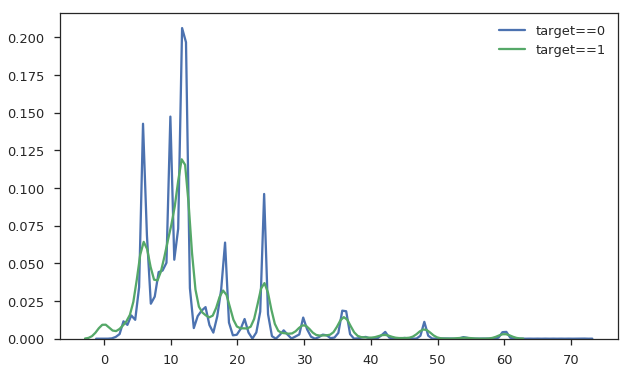

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res[app_train.TARGET == 0], label='target==0')
sns.kdeplot(res[app_train.TARGET == 1], label='target==1');

In [21]:
res = x.groupby('SK_ID_CURR')['CNT_PAYMENT'].std()
res = app_train.SK_ID_CURR.map(res)

print(res[res.isnull()].shape[0] / len(res))

0.26206867396613454


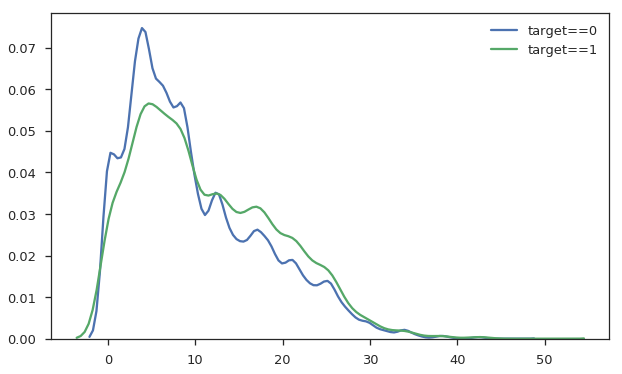

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res[app_train.TARGET == 0], label='target==0')
sns.kdeplot(res[app_train.TARGET == 1], label='target==1');

In [25]:
# only approved contracts
res = x[x.NAME_CONTRACT_STATUS == 'Approved'].groupby('SK_ID_CURR')['CNT_PAYMENT'].std()
res = app_train.SK_ID_CURR.map(res)

print(res[res.isnull()].shape[0] / len(res))

0.30596303872056607


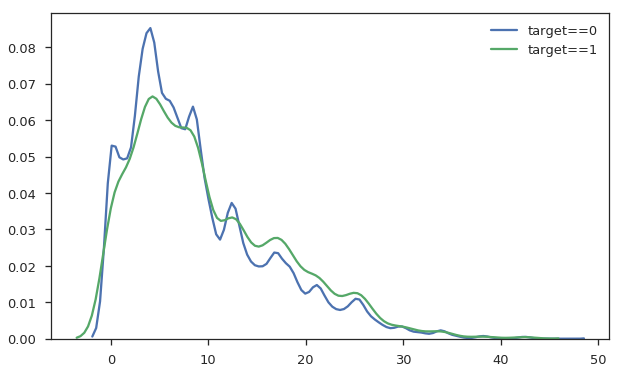

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(res[app_train.TARGET == 0], label='target==0')
sns.kdeplot(res[app_train.TARGET == 1], label='target==1');

### Relation NAME_SELLER_INDUSTRY and TARGET

In [4]:
x = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
         .merge(prev_app.loc[:, ['SK_ID_CURR', 
                                 'SK_ID_PREV', 
                                 'NAME_CONTRACT_STATUS', 
                                 'NAME_SELLER_INDUSTRY']], how='left'); x.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_STATUS  NAME_SELLER_INDUSTRY
0      100002     1.0   1038818.0             Approved       Auto technology
1      100003     0.0   1810518.0             Approved                   XNA
2      100003     0.0   2636178.0             Approved             Furniture
3      100003     0.0   2396755.0             Approved  Consumer electronics
4      100004     0.0   1564014.0             Approved          Connectivity

In [10]:
ss = x.groupby(['SK_ID_CURR', 'NAME_SELLER_INDUSTRY']).size().unstack().fillna(0)
ss = app_train.loc[:, ['SK_ID_CURR', 'TARGET']].merge(ss, left_on='SK_ID_CURR', right_index=True, how='left')
ss.head()

SK_ID_CURR  TARGET  Auto technology  Clothing  Connectivity  Construction  \
0      100002     1.0              1.0       0.0           0.0           0.0   
1      100003     0.0              0.0       0.0           0.0           0.0   
2      100004     0.0              0.0       0.0           1.0           0.0   
3      100006     0.0              0.0       0.0           0.0           1.0   
4      100007     0.0              0.0       0.0           1.0           0.0   

   Consumer electronics  Furniture  Industry  Jewelry  MLM partners  Tourism  \
0                   0.0        0.0       0.0      0.0           0.0      0.0   
1                   1.0        1.0       0.0      0.0           0.0      0.0   
2                   0.0        0.0       0.0      0.0           0.0      0.0   
3                   1.0        0.0       0.0      0.0           0.0      0.0   
4                   3.0        0.0       0.0      0.0           0.0      0.0   

   XNA  
0  0.0  
1  1.0  
2  0.0  
3  7.0  
4  2.0

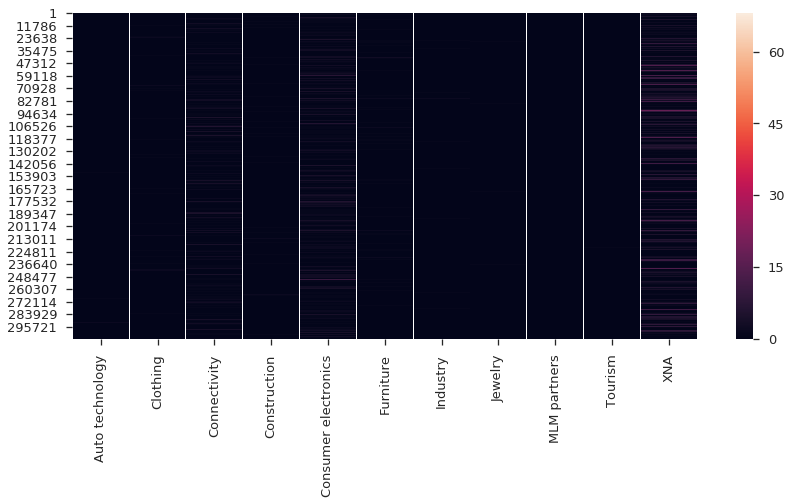

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(ss[ss.TARGET == 0].iloc[:, 2:]);

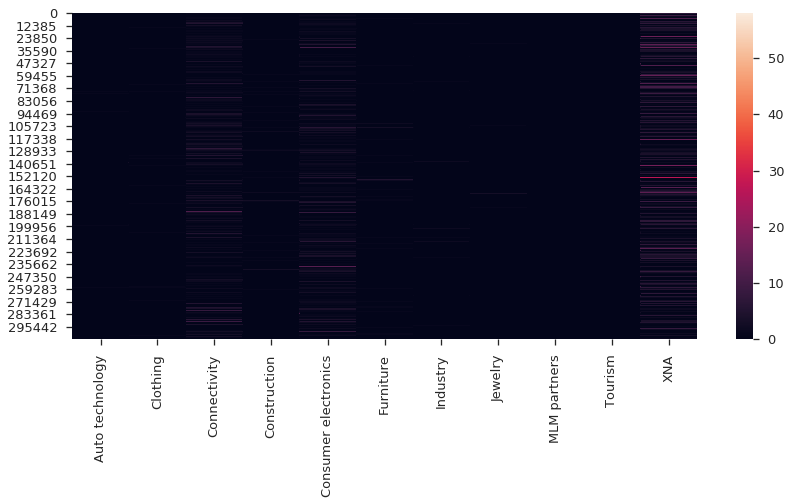

In [14]:
plt.figure(figsize=(14, 6))
sns.heatmap(ss[ss.TARGET == 1].iloc[:, 2:]);

## Analyze Output of Predictions

In [4]:
fold_pred = pd.Series(joblib.load(f'../data/interim/dataset1/preds_v60_model.txt_LGB_1708_F1_0.7935163823577832.pkl'))
fold      = pd.read_pickle('../data/interim/dataset1/application_F1test.pkl')

In [193]:
assert len(fold_pred) == len(fold)

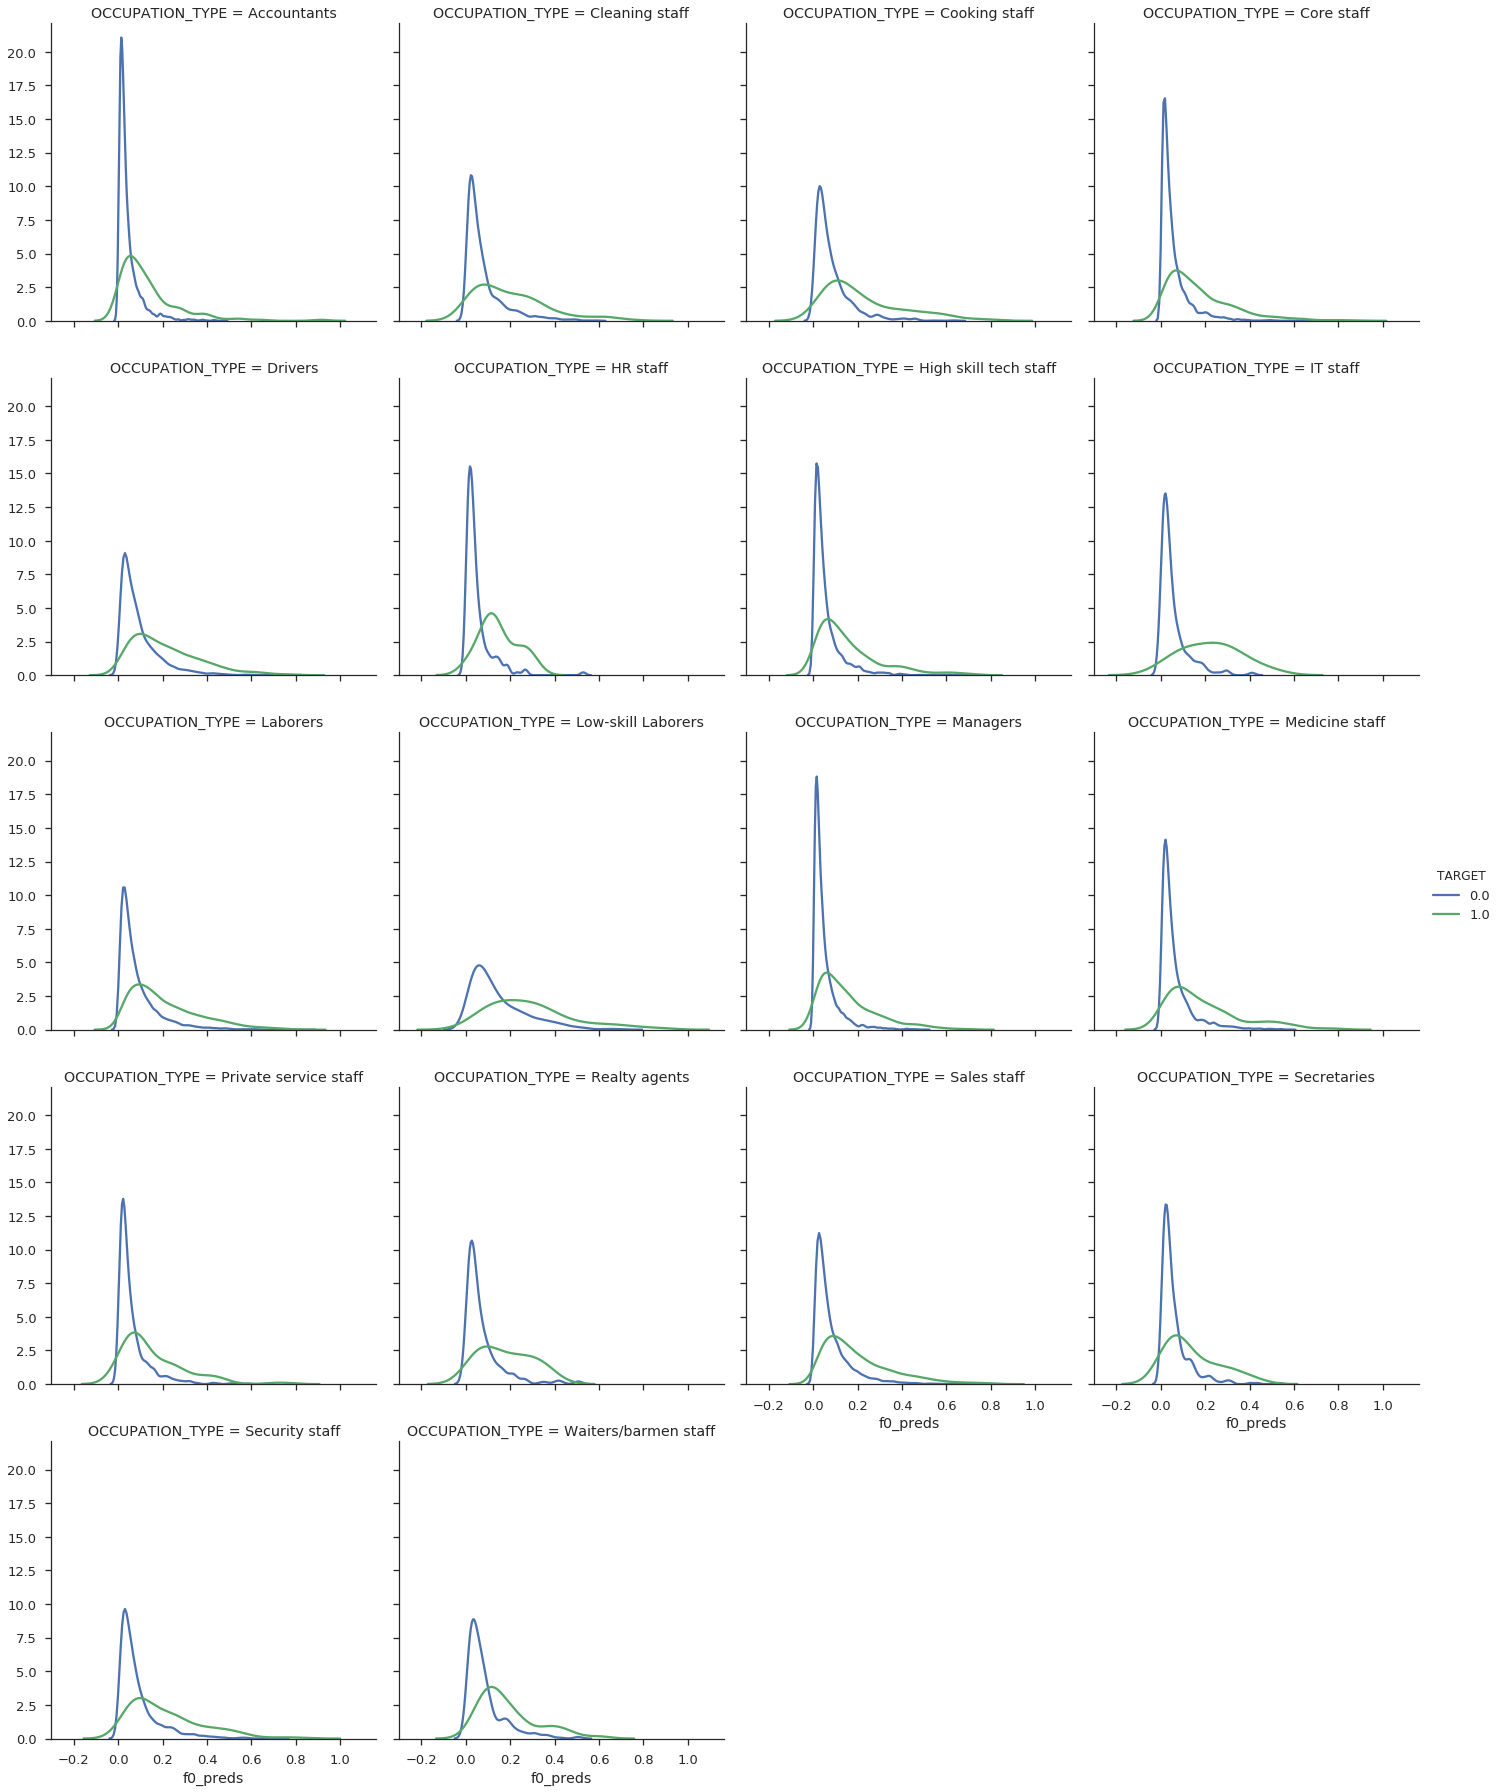

In [194]:
x = fold
x.loc[:, 'f0_preds'] = fold_pred.values
g = sns.FacetGrid(data=x,
                  col='OCCUPATION_TYPE',
                  hue='TARGET',
                  size=5,
                  col_wrap=4
                 )
g = g.map(sns.kdeplot, 'f0_preds').add_legend();

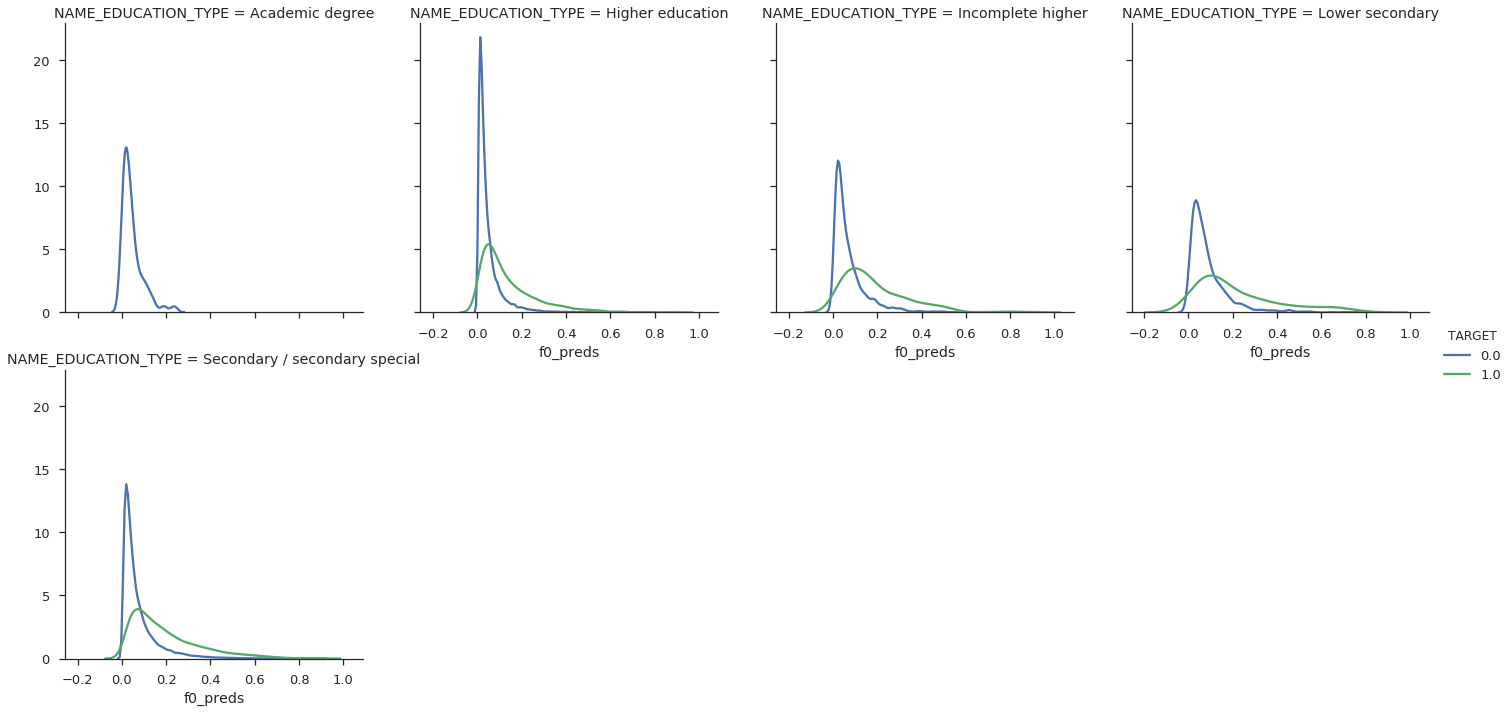

In [195]:
x = f0
x.loc[:, 'f0_preds'] = f0_pred.values
g = sns.FacetGrid(data=x,
                  col='NAME_EDUCATION_TYPE',
                  hue='TARGET',
                  size=5,
                  col_wrap=4
                 )
g = g.map(sns.kdeplot, 'f0_preds').add_legend();

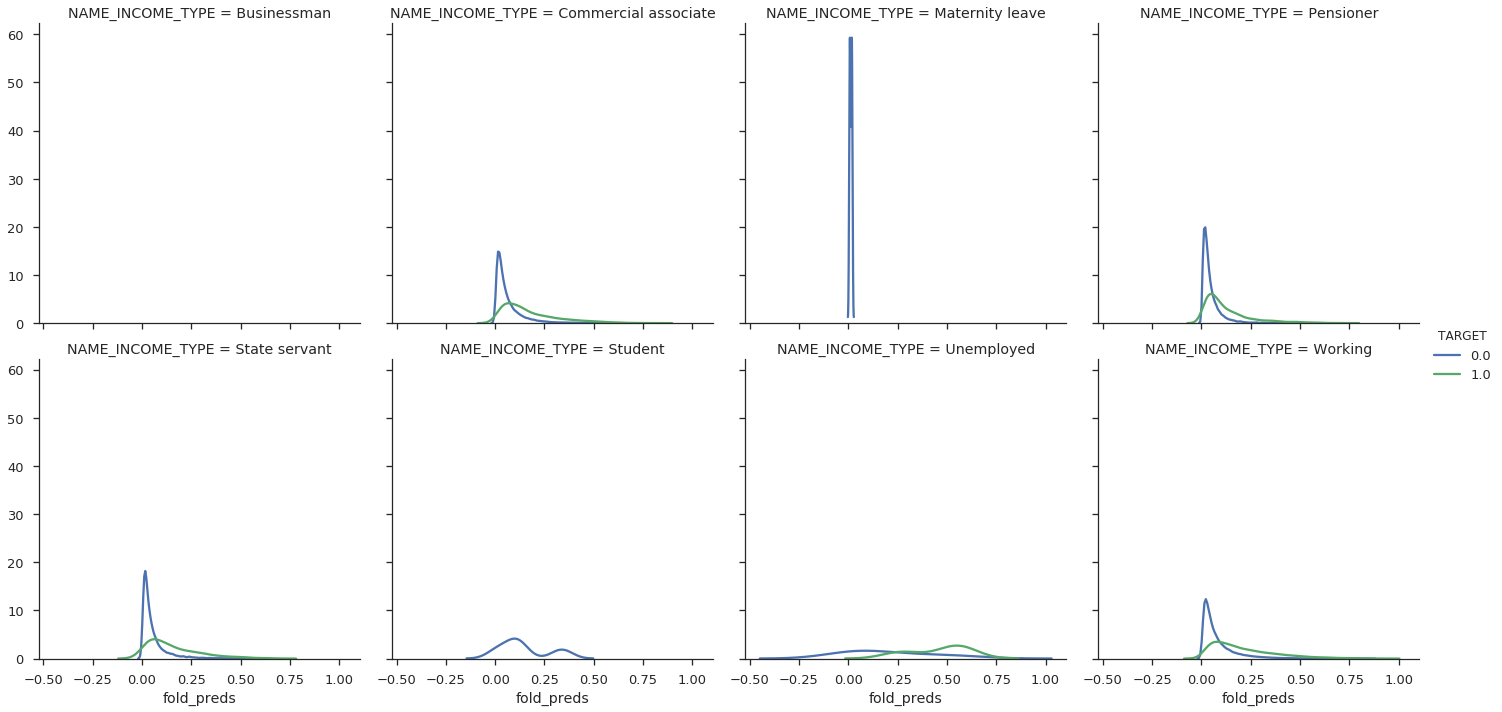

In [6]:
x = fold
x.loc[:, 'fold_preds'] = fold_pred.values
g = sns.FacetGrid(data=x,
                  col='NAME_INCOME_TYPE',
                  hue='TARGET',
                  size=5,
                  col_wrap=4
                 )
g = g.map(sns.kdeplot, 'fold_preds').add_legend();

In [205]:
x.groupby('OCCUPATION_TYPE').agg({'TARGET': [len, np.mean],
                                    'f0_preds': [np.mean]
                                  })

TARGET            f0_preds
                           len      mean      mean
OCCUPATION_TYPE                                   
Accountants             2928.0  0.050873  0.049385
Cleaning staff          1386.0  0.088013  0.087566
Cooking staff           1724.0  0.094543  0.092167
Core staff              8192.0  0.063232  0.063009
Drivers                 5620.0  0.115662  0.106324
HR staff                 172.0  0.052338  0.052040
High skill tech staff   3418.0  0.059967  0.064340
IT staff                 159.0  0.056610  0.059591
Laborers               16592.0  0.101990  0.102502
Low-skill Laborers       619.0  0.166382  0.150161
Managers                6416.0  0.062347  0.057377
Medicine staff          2592.0  0.070618  0.071031
Private service staff    822.0  0.060822  0.069430
Realty agents            229.0  0.087341  0.076110
Sales staff             9664.0  0.098877  0.091453
Secretaries              395.0  0.073425  0.062728
Security staff          2017.0  0.107605  0.099176
Waiters/barmen staff     400.0  0.099976  0.088983

In [204]:
x.groupby('ORGANIZATION_TYPE').agg({'TARGET': [len, np.mean],
                                    'f0_preds': [np.mean]
                                  })

TARGET            f0_preds
                            len      mean      mean
ORGANIZATION_TYPE                                  
Advertising               130.0  0.107666  0.073699
Agriculture               724.0  0.091187  0.102488
Bank                      773.0  0.036224  0.061955
Business Entity Type 1   1804.0  0.085938  0.082160
Business Entity Type 2   3160.0  0.083191  0.082034
Business Entity Type 3  20592.0  0.091797  0.086728
Cleaning                   84.0  0.095215  0.095342
Construction             2017.0  0.116028  0.108371
Culture                   111.0  0.054047  0.056717
Electricity               266.0  0.045105  0.068652
Emergency                 156.0  0.044861  0.065933
Government               3040.0  0.070740  0.070162
Hotel                     296.0  0.074341  0.071924
Housing                   852.0  0.089172  0.079019
Industry: type 1          316.0  0.113953  0.096237
Industry: type 10          27.0  0.074097  0.076325
Industry: type 11         786.0  0.073792  0.082771
Industry: type 12         101.0  0.059418  0.058955
Industry: type 13          21.0  0.142822  0.178817
Industry: type 2          143.0  0.097900  0.100437
Industry: type 3          983.0  0.110901  0.098121
Industry: type 4          232.0  0.094849  0.092309
Industry: type 5          162.0  0.043213  0.080108
Industry: type 6           27.0  0.037048  0.062509
Industry: type 7          402.0  0.069641  0.084084
Industry: type 8            6.0  0.166626  0.043226
Industry: type 9         1068.0  0.060852  0.073719
Insurance                 167.0  0.053894  0.051488
Kindergarten             2002.0  0.069458  0.073076
Legal Services             98.0  0.081604  0.043250
Medicine                 3378.0  0.066589  0.065487
Military                  781.0  0.040985  0.057670
Mobile                     97.0  0.113403  0.085155
Other                    4984.0  0.078613  0.077841
Police                    674.0  0.054901  0.053889
Postal                    631.0  0.090332  0.077884
Realtor                   117.0  0.111084  0.080876
Religion                   22.0  0.000000  0.059018
Restaurant                551.0  0.103455  0.100959
School                   2660.0  0.060150  0.059274
Security                  994.0  0.097595  0.097859
Security Ministries       626.0  0.046326  0.060192
Self-employed           11528.0  0.103638  0.095416
Services                  482.0  0.060181  0.069005
Telecom                   187.0  0.064148  0.067501
Trade: type 1             103.0  0.116516  0.106569
Trade: type 2             567.0  0.075867  0.075939
Trade: type 3            1113.0  0.094360  0.091770
Trade: type 4              28.0  0.000000  0.066327
Trade: type 5              16.0  0.125000  0.061656
Trade: type 6             175.0  0.057129  0.055911
Trade: type 7            2320.0  0.100403  0.089234
Transport: type 1          65.0  0.015381  0.063000
Transport: type 2         644.0  0.097839  0.083995
Transport: type 3         348.0  0.169556  0.133883
Transport: type 4        1636.0  0.084961  0.088244
University                377.0  0.047760  0.054068
XNA                     16592.0  0.054962  0.051398

In [203]:
x.groupby('NAME_INCOME_TYPE').agg({'TARGET': [len, np.mean],
                                   'f0_preds': [np.mean]
                                  })

TARGET            f0_preds
                          len      mean      mean
NAME_INCOME_TYPE                                 
Businessman               5.0  0.000000  0.019397
Commercial associate  21680.0  0.074585  0.072058
Maternity leave           2.0  0.500000  0.079213
Pensioner             16592.0  0.054840  0.051307
State servant          6464.0  0.055206  0.057500
Student                   5.0  0.000000  0.062005
Unemployed                8.0  0.250000  0.222489
Working               47488.0  0.096069  0.092189

In [199]:
x.groupby('NAME_INCOME_TYPE')['f0_preds'].mean()

NAME_INCOME_TYPE
Businessman             0.019397
Commercial associate    0.072058
Maternity leave         0.079213
Pensioner               0.051307
State servant           0.057500
Student                 0.062005
Unemployed              0.222489
Working                 0.092189
Name: f0_preds, dtype: float64

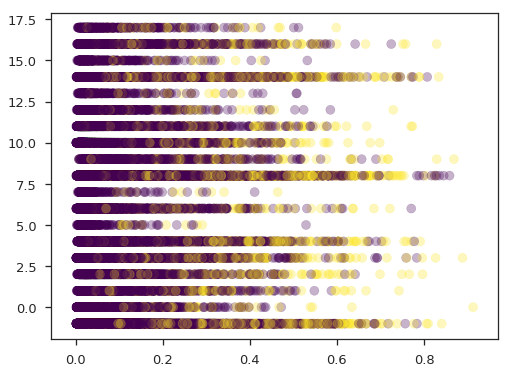

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x['fold_preds'], 
            x.OCCUPATION_TYPE.cat.codes,
            alpha=.3,
            c=x.TARGET, 
            cmap='viridis');